# Xebra MC Calibration simulations - Clustering Prestudies

In [1]:
## Check Python version:
!python -V
!which root

Python 3.7.0


In [2]:
## Largest positive integer supported by the platform's Py_ssize_t type:
import sys
sys.maxsize

9223372036854775807

## Imports and function definitions

In [3]:
## Imports:

import numpy as np
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
from matplotlib import gridspec            # to arrange the plots nicely
%matplotlib inline

import uproot                              # uproot for easy import of ROOT tree contents
import collections                         # used for named tuples
import pandas as pd

In [4]:
## Function definitions:

def flatten_tuples(tup):
    return np.array([element for tupl in tup for element in tupl])

def sum_tuple_subentries(tup):
    return [np.sum(tupl) for tupl in tup]

def nth_tuple_subentries(tup, n):
    return [tupl[n] for tupl in tup]

In [5]:
## Available ROOT files in specified folder:
! ls ../../Xebra_G4/*.root
#! ls ../../Analysis/Calibration_simulations_pointsource/data/*.root
! ls ../../Simulation_Data/Calibration_simulations_pointsource/*.root

ls: cannot access '../../Xebra_G4/*.root': No such file or directory
../../Simulation_Data/Calibration_simulations_pointsource/Cs137_1e5_noscint.root
../../Simulation_Data/Calibration_simulations_pointsource/Cs137_1e5_scint.root
../../Simulation_Data/Calibration_simulations_pointsource/Cs137_1e6_noscint_inside.root
../../Simulation_Data/Calibration_simulations_pointsource/Cs137_1e7_noscint.root
../../Simulation_Data/Calibration_simulations_pointsource/Cs137_1e8_noscint.root


In [6]:
! ls -sh ../../Simulation_Data/Calibration_simulations_pointsource/*.root

1,2M ../../Simulation_Data/Calibration_simulations_pointsource/Cs137_1e5_noscint.root
1,4M ../../Simulation_Data/Calibration_simulations_pointsource/Cs137_1e5_scint.root
124M ../../Simulation_Data/Calibration_simulations_pointsource/Cs137_1e6_noscint_inside.root
 87M ../../Simulation_Data/Calibration_simulations_pointsource/Cs137_1e7_noscint.root
853M ../../Simulation_Data/Calibration_simulations_pointsource/Cs137_1e8_noscint.root


In [7]:
## Selection of file to be analyzed:
#filename = '../../Simulation_Data/Calibration_simulations_pointsource/Cs137_1e6_noscint_inside.root'
filename = '../../Simulation_Data/Calibration_simulations_pointsource/Cs137_1e8_noscint.root'

In [8]:
# filename prefix for automatically naming outputs

if filename[6:14] == 'Xebra_G4':
    filenameprefix = filename[:-5][15:]
    
elif filename[6:57] == 'Simulation_Data/Calibration_simulations_pointsource':
    filenameprefix = filename[:-5][58:]

else:
    filenameprefix = 'filenameprefix'
    
print(filenameprefix)

Cs137_1e8_noscint


## Extraction and processing of input data

In [9]:
## Inspect branches:
f = uproot.open(filename)['events/events']
eventid = f['eventid'].array()
f.keys()
print(f.keys())

[b'eventid', b'ntpmthits', b'nbpmthits', b'nLSpmthits', b'nWaterpmthits', b'pmthits', b'etot', b'nsteps', b'trackid', b'type', b'parentid', b'parenttype', b'creaproc', b'edproc', b'xp', b'yp', b'zp', b'ed', b'time', b'ekin', b'pre_MomDirX', b'pre_MomDirY', b'pre_MomDirZ', b'post_MomDirX', b'post_MomDirY', b'post_MomDirZ', b'pre_ekin', b'post_ekin', b'type_pri', b'e_pri', b'xp_pri', b'yp_pri', b'zp_pri', b'xp_fcd', b'yp_fcd', b'zp_fcd', b'w_pri', b'NSave', b'Save_flag', b'Save_type', b'Save_x', b'Save_y', b'Save_z', b'Save_cx', b'Save_cy', b'Save_cz', b'Save_e', b'Save_t', b'Save_trkid']


In [10]:
## Import as panda dataframes

branches= ['xp_pri','yp_pri','zp_pri','xp','yp','zp','etot','ed','nsteps'] # Be careful that the branches are also initilized in _chunk_collect

import concurrent.futures
executor = concurrent.futures.ThreadPoolExecutor(8)

_chunk_collect = pd.DataFrame({'xp_pri' : [],'yp_pri' : [],'zp_pri' : [], 'xp' : [],'yp' : [],'zp' : [],'etot' : [],'ed' : [],'nsteps' : []}) # Initialize empty data frame

for _chunk in uproot.iterate(filename, "events/events",branches, entrysteps=100000, 
                                       outputtype=pd.DataFrame, executor=executor):
    _chunk.columns=branches
    #_chunk =_chunk[ _chunk['ed'].apply(lambda x: len(x)==1) ] # Remove events with more than one scatter
    #_chunk =_chunk.applymap(lambda x: x[0]) # Convert lists in cells by taking only the 0th element
    #_chunk.type_pri =_chunk.type_pri.apply(lambda x: x.decode("utf-8")) # Decode bytestrings for primary type
    _chunk_collect = _chunk_collect.append(_chunk)

#print(_chunk.tail(10))
#_chunk_collect.tail(10)
#_chunk_collect.head(10)
#_chunk_collect

/home/ab602/anaconda3/lib/python3.7/site-packages/uproot/tree.py:116: FutureWarning: Int64Index.data is deprecated and will be removed in a future version
  index = awkward.numpy.frombuffer(arrays.index.data, dtype=arrays.index.dtype)


In [11]:
_chunk_collect

,xp_pri,yp_pri,zp_pri,xp,yp,zp,etot,ed,nsteps
0,0.0,-122.0,-35.75,"[4.750792, 10.40581, 14.108652, 14.111181, 13....","[-31.04901, -14.779298, 1.4798166, 1.4815265, ...","[-71.35, -66.60782, -60.546505, -60.552197, -6...",427.166046,"[0.0, 0.04722, 0.09384, 0.05619, 0.11854, 0.04...",50.0
1,0.0,-122.0,-35.75,"[13.207373, 13.113906, -4.431226, 13.545091, 1...","[-26.630098, -26.487402, -4.16421, -26.379604,...","[-30.789839, -30.602337, -0.15, -30.73374, -30...",304.067932,"[0.32037, 0.0, 0.0, 0.25772, 0.03321, 0.0, 0.0...",62.0
2,0.0,-122.0,-35.75,"[16.16731, 17.120193, 17.098091, 17.08537, 17....","[-14.827446, -12.074706, -11.677445, -11.69076...","[-25.162727, -25.073969, -24.812891, -24.83300...",331.792633,"[0.19954, 0.09417, 0.08179, 0.10679, 0.03388, ...",53.0
3,0.0,-122.0,-35.75,"[-12.541989, -11.679557, -11.679557, -11.67955...","[-6.8088393, -10.319194, -10.319194, -10.31919...","[-54.062786, -57.54069, -57.54069, -57.54069, ...",606.367310,"[0.16407, 0.17841, 0.03182, 0.0, 0.03388, 0.0,...",48.0
4,0.0,-122.0,-35.75,"[-11.797138, -22.622345, -24.853264, -25.12531...","[-22.710793, 26.706358, 16.991205, 17.311138, ...","[-33.730537, -23.957024, -25.82216, -26.14465,...",205.982071,"[0.16437, 0.0, 0.09324, 0.17623, 0.03321, 0.0,...",57.0
5,0.0,-122.0,-35.75,"[20.739544, 34.997673, 20.74157, 20.74157, 20....","[-25.507566, -0.40358594, -25.51167, -25.51167...","[-66.82561, -53.49821, -66.82397, -66.82397, -...",289.853912,"[0.09444, 0.0, 0.09444, 0.02056, 0.0, 0.02262,...",22.0
6,0.0,-122.0,-35.75,"[3.339573, 3.1579683, 2.7894282, 2.789428, 2.7...","[-19.112982, -20.422457, -20.644861, -20.64486...","[-61.483376, -58.756927, -59.03232, -59.03232,...",661.657288,"[0.02192, 0.25911, 0.21129, 0.02056, 0.0, 0.04...",63.0
7,0.0,-122.0,-35.75,"[-32.455544, -34.99966, -32.455544, -32.455544...","[0.8496386, -0.154539, 0.8496387, 0.8496387, 0...","[-12.92128, -11.866484, -12.92128, -12.92128, ...",363.838440,"[0.09245, 0.0, 0.04586, 0.0, 0.02056, 0.0, 0.0...",17.0
8,0.0,-122.0,-35.75,"[-20.390615, -20.390615, -20.390615, -20.39061...","[15.580659, 15.580659, 15.580659, 15.580659, 1...","[-65.907684, -65.907684, -65.907684, -65.90768...",661.657288,"[0.43444, 0.02056, 0.0, 0.02056, 0.0, 0.04586,...",54.0
9,0.0,-122.0,-35.75,"[2.273486, 2.387512, 2.387512, 2.387512, 2.387...","[-23.801083, -24.053165, -24.053165, -24.05316...","[-10.3998165, -10.314109, -10.314109, -10.3141...",233.701736,"[0.14894, 0.15202, 0.02262, 0.0, 0.04447, 0.0,...",42.0


In [12]:
## Process data:

nevents = len(_chunk_collect.xp_pri)
print('nevents: '+str(nevents))

#zp_flat = flatten_tuples(_chunk_collect.zp)

nevents: 552934


## Clustering

Try to extract only single scatter events -> need clustering

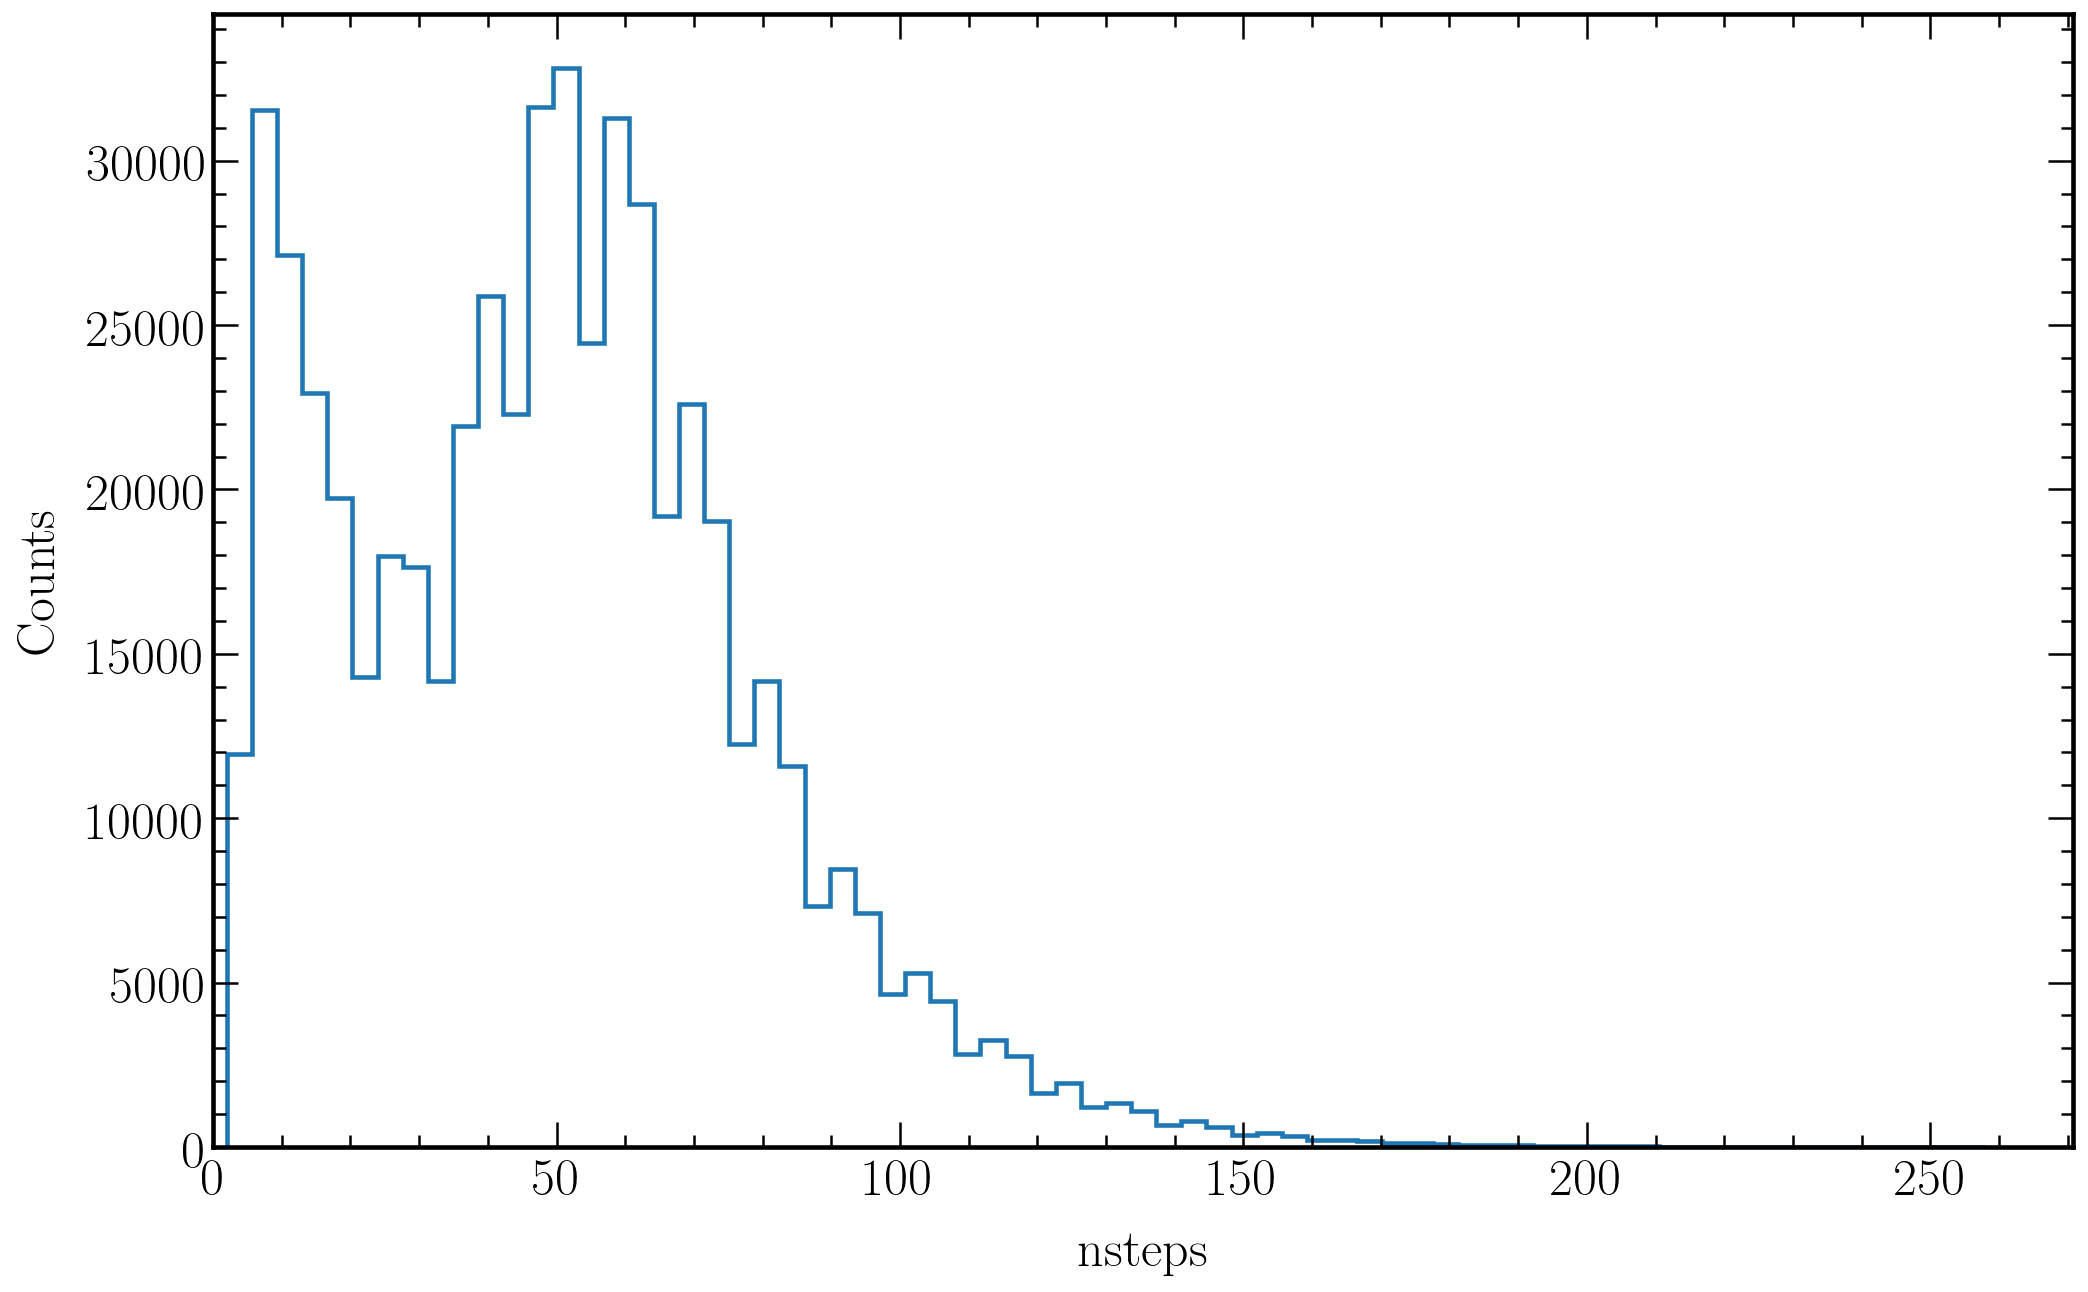

In [13]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 25
label_pad = 10
title_size = 30
title_pad = 20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot
n, bins, patches = plt.hist(_chunk_collect.nsteps, 70, facecolor='darkblue', histtype = 'step', linewidth = 2.2)

plt.xlabel('nsteps', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Counts', fontsize = label_size, labelpad = label_pad)
#plt.title('Simulated $^{137}$Cs spectrum from total deposited energy', fontsize = title_size, pad = title_pad)

# Axes ---> Shading an area or Drawing a vertica line
#axes.axvspan(662-10, 662+10, alpha=0.5, color='0.8')
#plt.axvline(662, alpha=0.5, color='grey')

# Axes ---> Range
#plt.xlim(0,700)
#plt.ylim(0,16000)
plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

plt.show()

fig.savefig(filenameprefix+"_nsteps_spectrum.png")

### Exemplary interaction positions

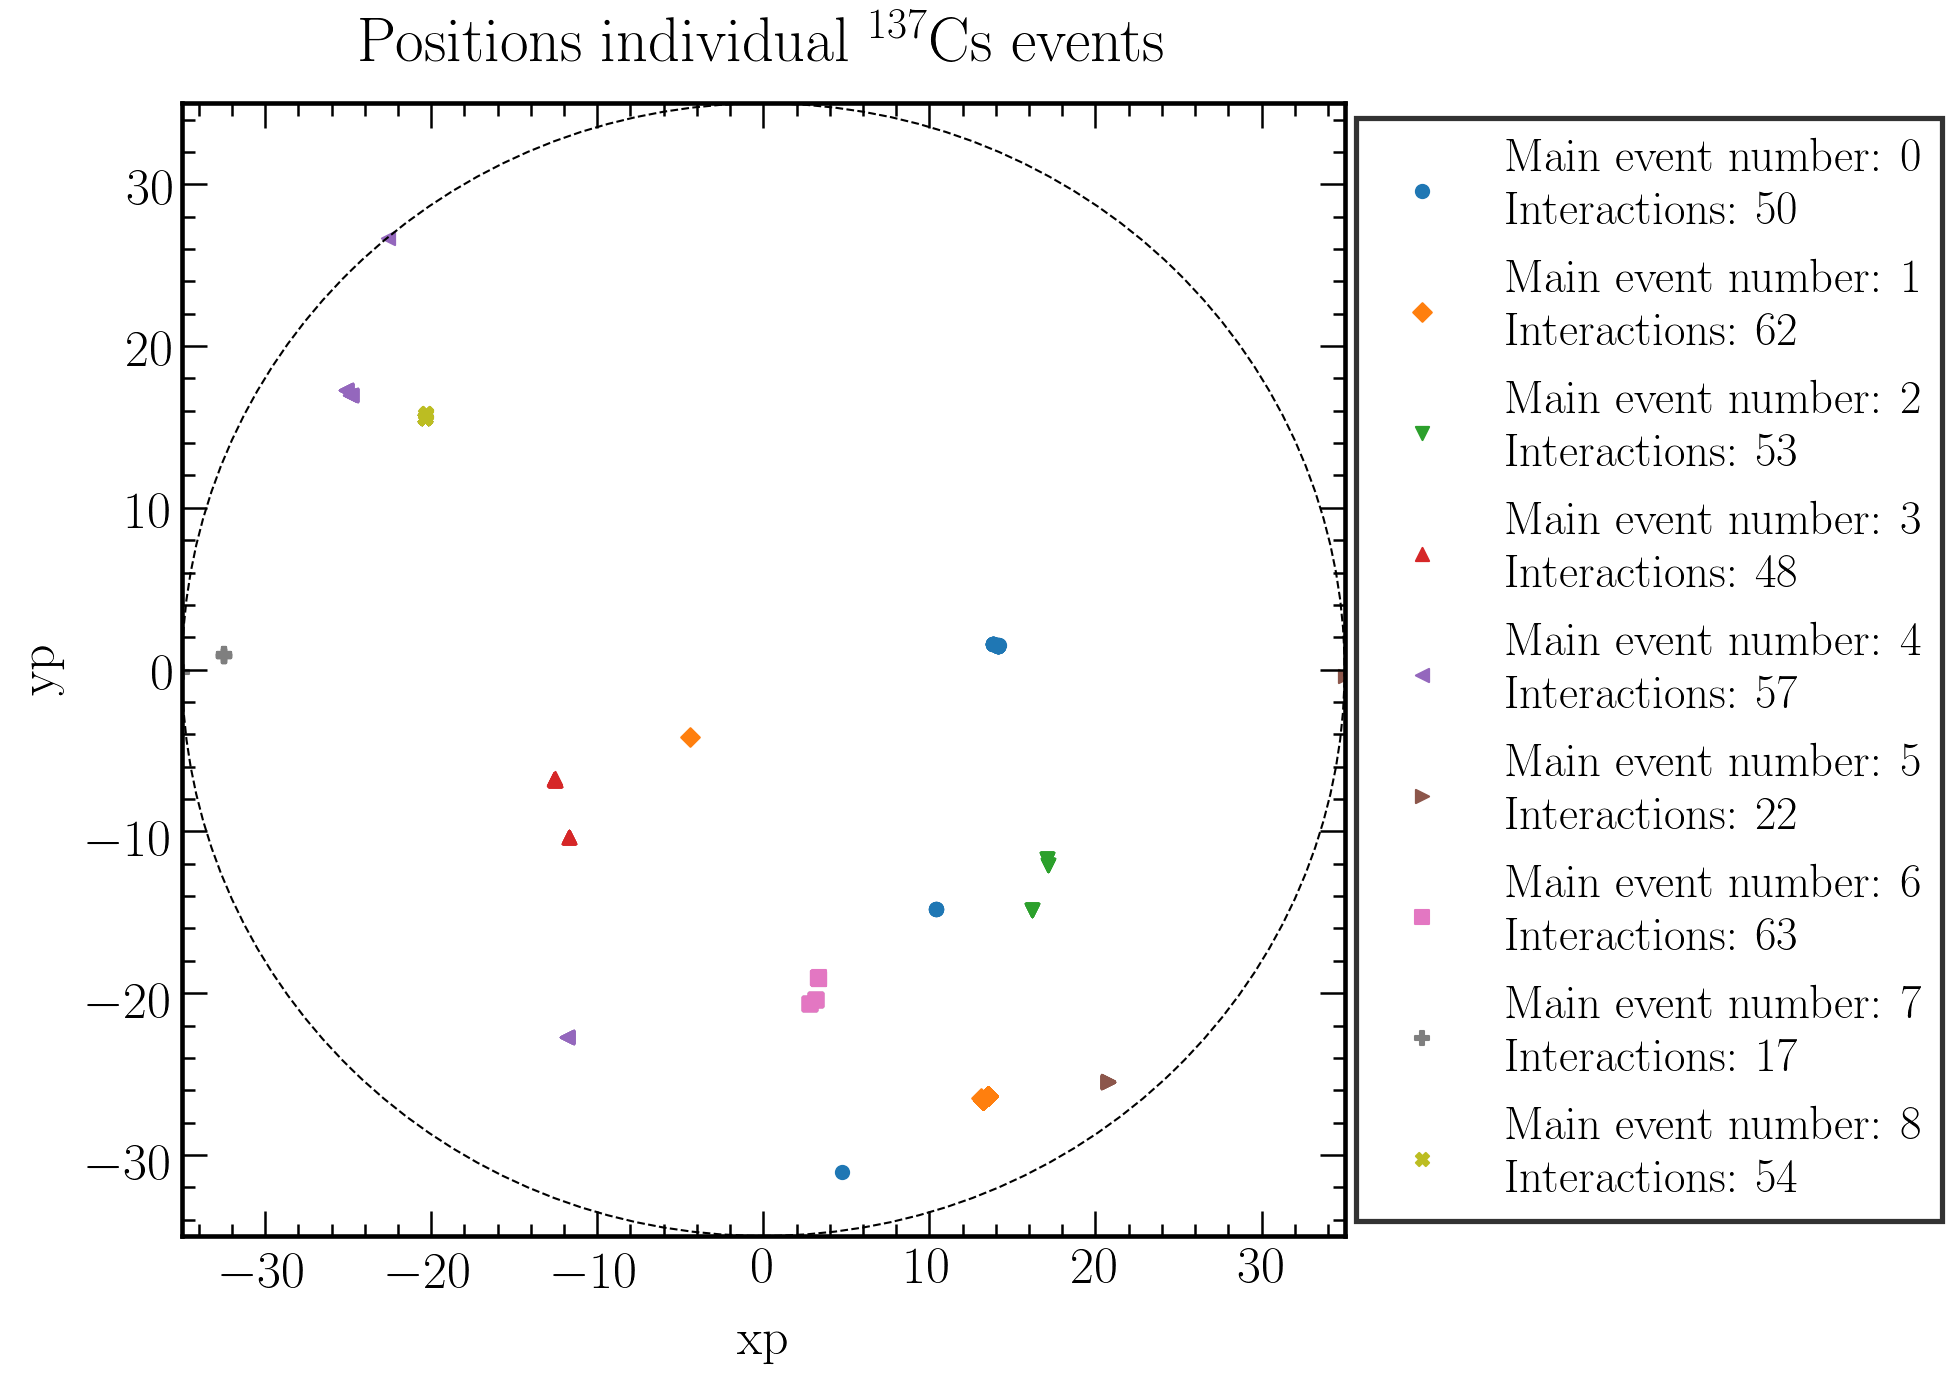

In [14]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(10, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 25
label_pad = 10
title_size = 30
title_pad = 20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot
i = 0
ssize = 40
plt.scatter(_chunk_collect.xp[i], _chunk_collect.yp[i], s = ssize, marker='o', label = 'Main event number: '+str(i+0)+'\nInteractions: '+str(len(_chunk_collect.xp[0])))
plt.scatter(_chunk_collect.xp[i+1], _chunk_collect.yp[i+1], s = ssize, marker='D', label = 'Main event number: '+str(i+1)+'\nInteractions: '+str(len(_chunk_collect.xp[1])))
plt.scatter(_chunk_collect.xp[i+2], _chunk_collect.yp[i+2], s = ssize, marker='v', label = 'Main event number: '+str(i+2)+'\nInteractions: '+str(len(_chunk_collect.xp[2])))
plt.scatter(_chunk_collect.xp[i+3], _chunk_collect.yp[i+3], s = ssize, marker='^', label = 'Main event number: '+str(i+3)+'\nInteractions: '+str(len(_chunk_collect.xp[3])))
plt.scatter(_chunk_collect.xp[i+4], _chunk_collect.yp[i+4], s = ssize, marker='<', label = 'Main event number: '+str(i+4)+'\nInteractions: '+str(len(_chunk_collect.xp[4])))
plt.scatter(_chunk_collect.xp[i+5], _chunk_collect.yp[i+5], s = ssize, marker='>', label = 'Main event number: '+str(i+5)+'\nInteractions: '+str(len(_chunk_collect.xp[5])))
plt.scatter(_chunk_collect.xp[i+6], _chunk_collect.yp[i+6], s = ssize, marker='s', label = 'Main event number: '+str(i+6)+'\nInteractions: '+str(len(_chunk_collect.xp[6])))
plt.scatter(_chunk_collect.xp[i+7], _chunk_collect.yp[i+7], s = ssize, marker='P', label = 'Main event number: '+str(i+7)+'\nInteractions: '+str(len(_chunk_collect.xp[7])))
plt.scatter(_chunk_collect.xp[i+8], _chunk_collect.yp[i+8], s = ssize, marker='X', label = 'Main event number: '+str(i+8)+'\nInteractions: '+str(len(_chunk_collect.xp[8])))

plt.xlabel('xp', fontsize = label_size, labelpad = label_pad)
plt.ylabel('yp', fontsize = label_size, labelpad = label_pad)
plt.title('Positions individual $^{137}$Cs events', fontsize = title_size, pad = title_pad)

# Axes ---> Shading an area or Drawing a vertica line
#axes.axvspan(662-10, 662+10, alpha=0.5, color='0.8')
#plt.axvline(662, alpha=0.5, color='grey')

# Axes ---> Range
plt.xlim(-35,35)
plt.ylim(-35,35)

# Draw circle
ax = fig.gca()
circle1 = plt.Circle((0, 0), 35, color='black', linestyle = 'dashed', fill=False)
ax.add_artist(circle1)

# Legend
leg = plt.legend(loc=6, bbox_to_anchor=(0.99,0.5), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False) #, title="Ingredients"
leg.get_title().set_fontsize(label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5) 

plt.show()

fig.savefig(filenameprefix+"_xp_yp_exemplaryscatterplots.png", bbox_extra_artists=(leg,), bbox_inches='tight')

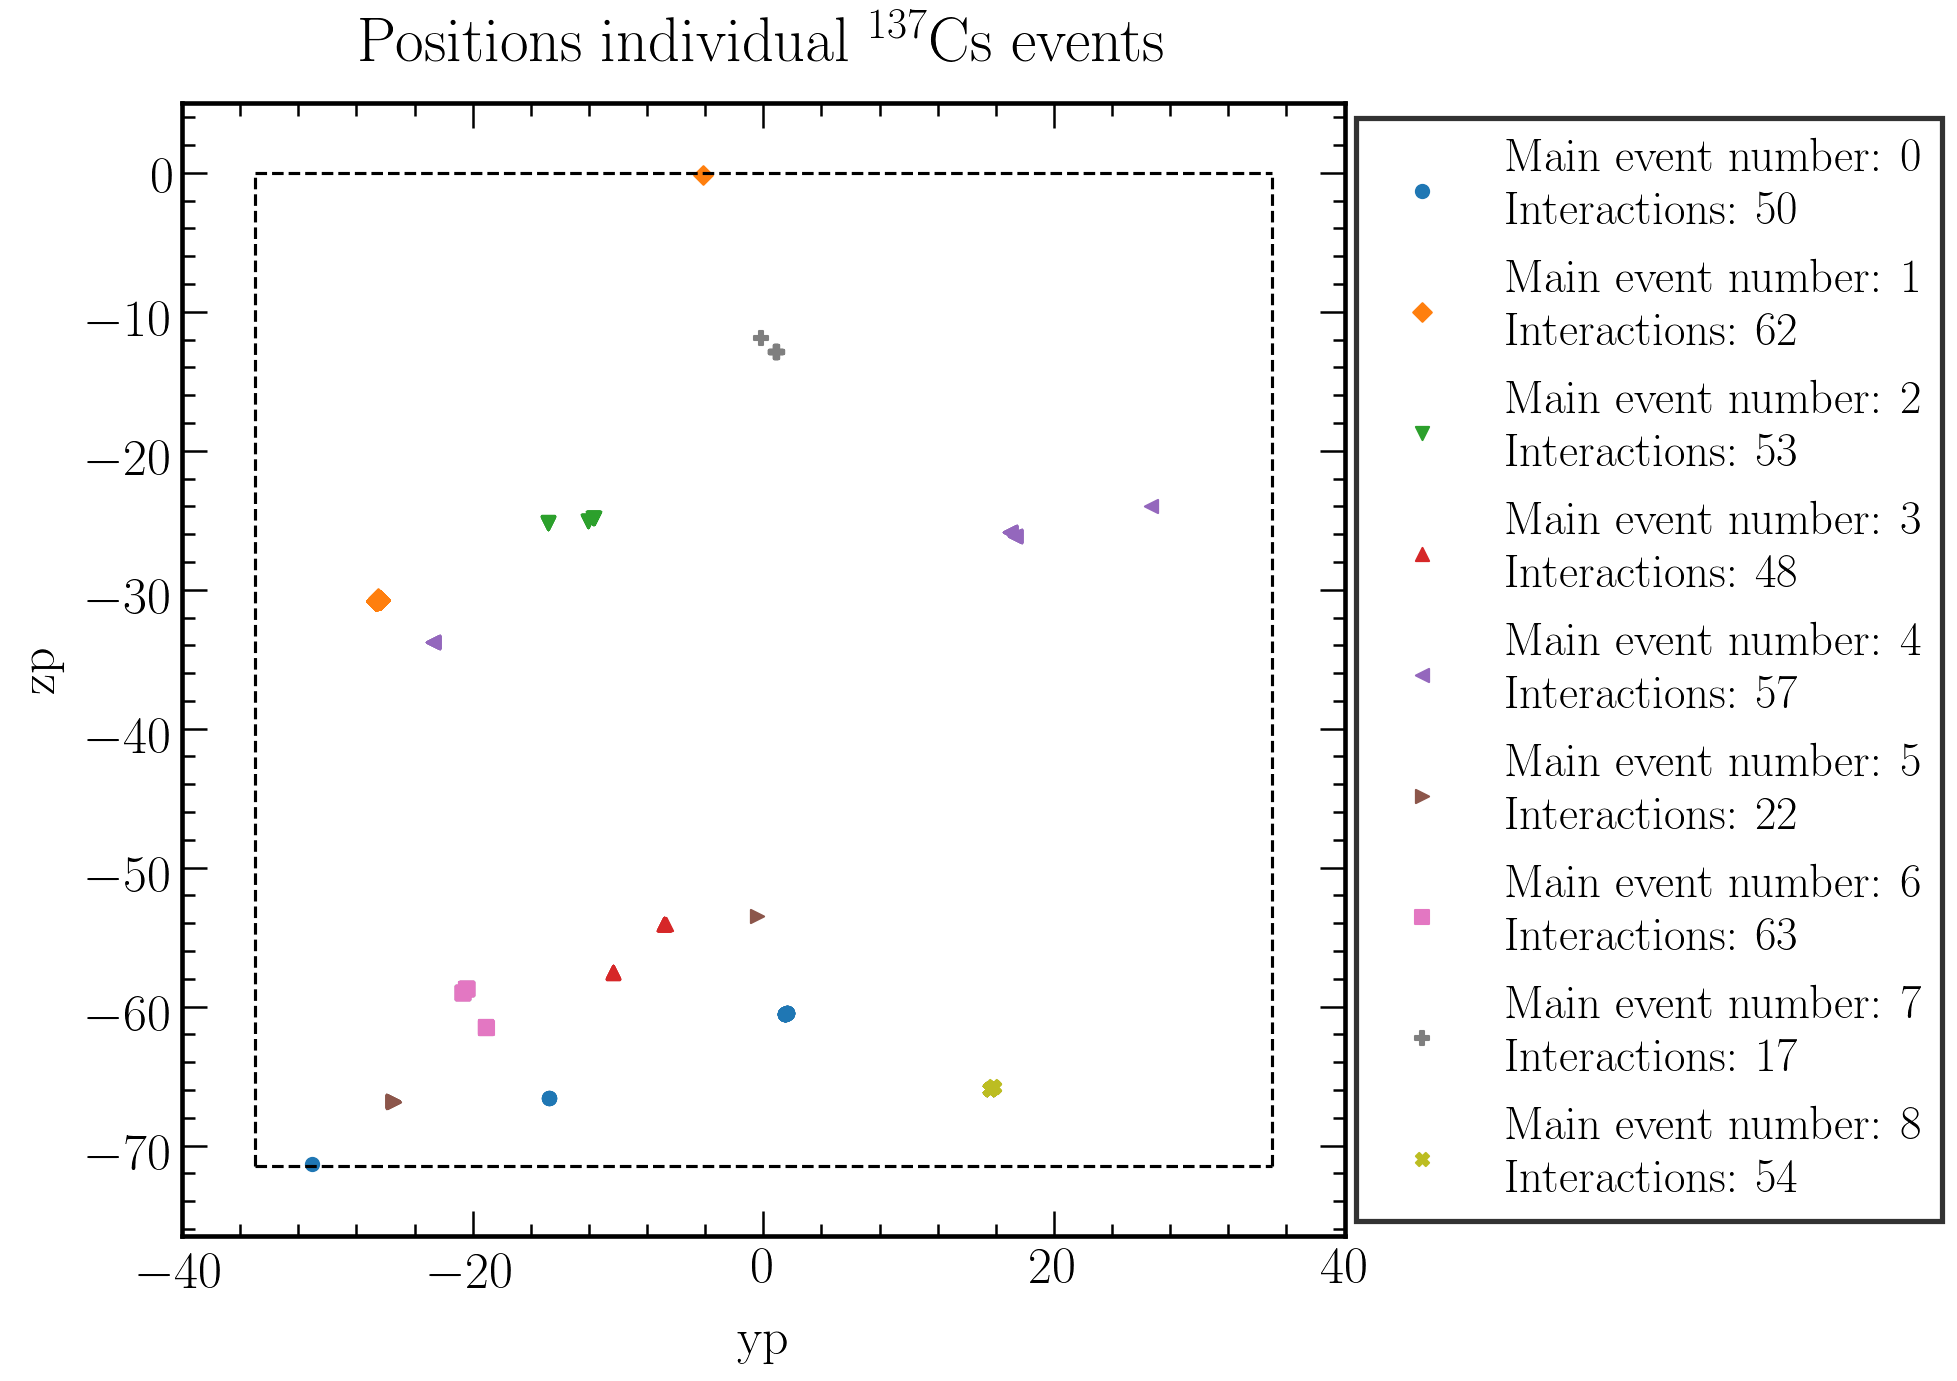

In [15]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(10, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 25
label_pad = 10
title_size = 30
title_pad = 20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot
i = 0
ssize = 40
plt.scatter(_chunk_collect.yp[i], _chunk_collect.zp[i], s = ssize, marker='o', label = 'Main event number: '+str(i+0)+'\nInteractions: '+str(len(_chunk_collect.xp[0])))
plt.scatter(_chunk_collect.yp[i+1], _chunk_collect.zp[i+1], s = ssize, marker='D', label = 'Main event number: '+str(i+1)+'\nInteractions: '+str(len(_chunk_collect.xp[1])))
plt.scatter(_chunk_collect.yp[i+2], _chunk_collect.zp[i+2], s = ssize, marker='v', label = 'Main event number: '+str(i+2)+'\nInteractions: '+str(len(_chunk_collect.xp[2])))
plt.scatter(_chunk_collect.yp[i+3], _chunk_collect.zp[i+3], s = ssize, marker='^', label = 'Main event number: '+str(i+3)+'\nInteractions: '+str(len(_chunk_collect.xp[3])))
plt.scatter(_chunk_collect.yp[i+4], _chunk_collect.zp[i+4], s = ssize, marker='<', label = 'Main event number: '+str(i+4)+'\nInteractions: '+str(len(_chunk_collect.xp[4])))
plt.scatter(_chunk_collect.yp[i+5], _chunk_collect.zp[i+5], s = ssize, marker='>', label = 'Main event number: '+str(i+5)+'\nInteractions: '+str(len(_chunk_collect.xp[5])))
plt.scatter(_chunk_collect.yp[i+6], _chunk_collect.zp[i+6], s = ssize, marker='s', label = 'Main event number: '+str(i+6)+'\nInteractions: '+str(len(_chunk_collect.xp[6])))
plt.scatter(_chunk_collect.yp[i+7], _chunk_collect.zp[i+7], s = ssize, marker='P', label = 'Main event number: '+str(i+7)+'\nInteractions: '+str(len(_chunk_collect.xp[7])))
plt.scatter(_chunk_collect.yp[i+8], _chunk_collect.zp[i+8], s = ssize, marker='X', label = 'Main event number: '+str(i+8)+'\nInteractions: '+str(len(_chunk_collect.xp[8])))

plt.xlabel('yp', fontsize = label_size, labelpad = label_pad)
plt.ylabel('zp', fontsize = label_size, labelpad = label_pad)
plt.title('Positions individual $^{137}$Cs events', fontsize = title_size, pad = title_pad)

# Axes ---> Shading an area or Drawing a vertica line
#axes.axvspan(662-10, 662+10, alpha=0.5, color='0.8')
#plt.axvline(662, alpha=0.5, color='grey')

# Axes ---> Range
plt.xlim(-40,40)
plt.ylim(-76.5,5)

# Rectangle active volume
plt.plot([-35., 35.],[-71.5,-71.5], color='black', linestyle = 'dashed')
plt.plot([-35., 35.],[0,0], color='black', linestyle = 'dashed')
plt.plot([35.,35.],[-71.5,0], color='black', linestyle = 'dashed')
plt.plot([-35.,-35.],[-71.5,0], color='black', linestyle = 'dashed')

# Legend
leg = plt.legend(loc=6, bbox_to_anchor=(0.99,0.5), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False) #, title="Ingredients"
leg.get_title().set_fontsize(label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5) 

plt.show()

fig.savefig(filenameprefix+"_yp_zp_exemplaryscatterplots.png", bbox_extra_artists=(leg,), bbox_inches='tight')

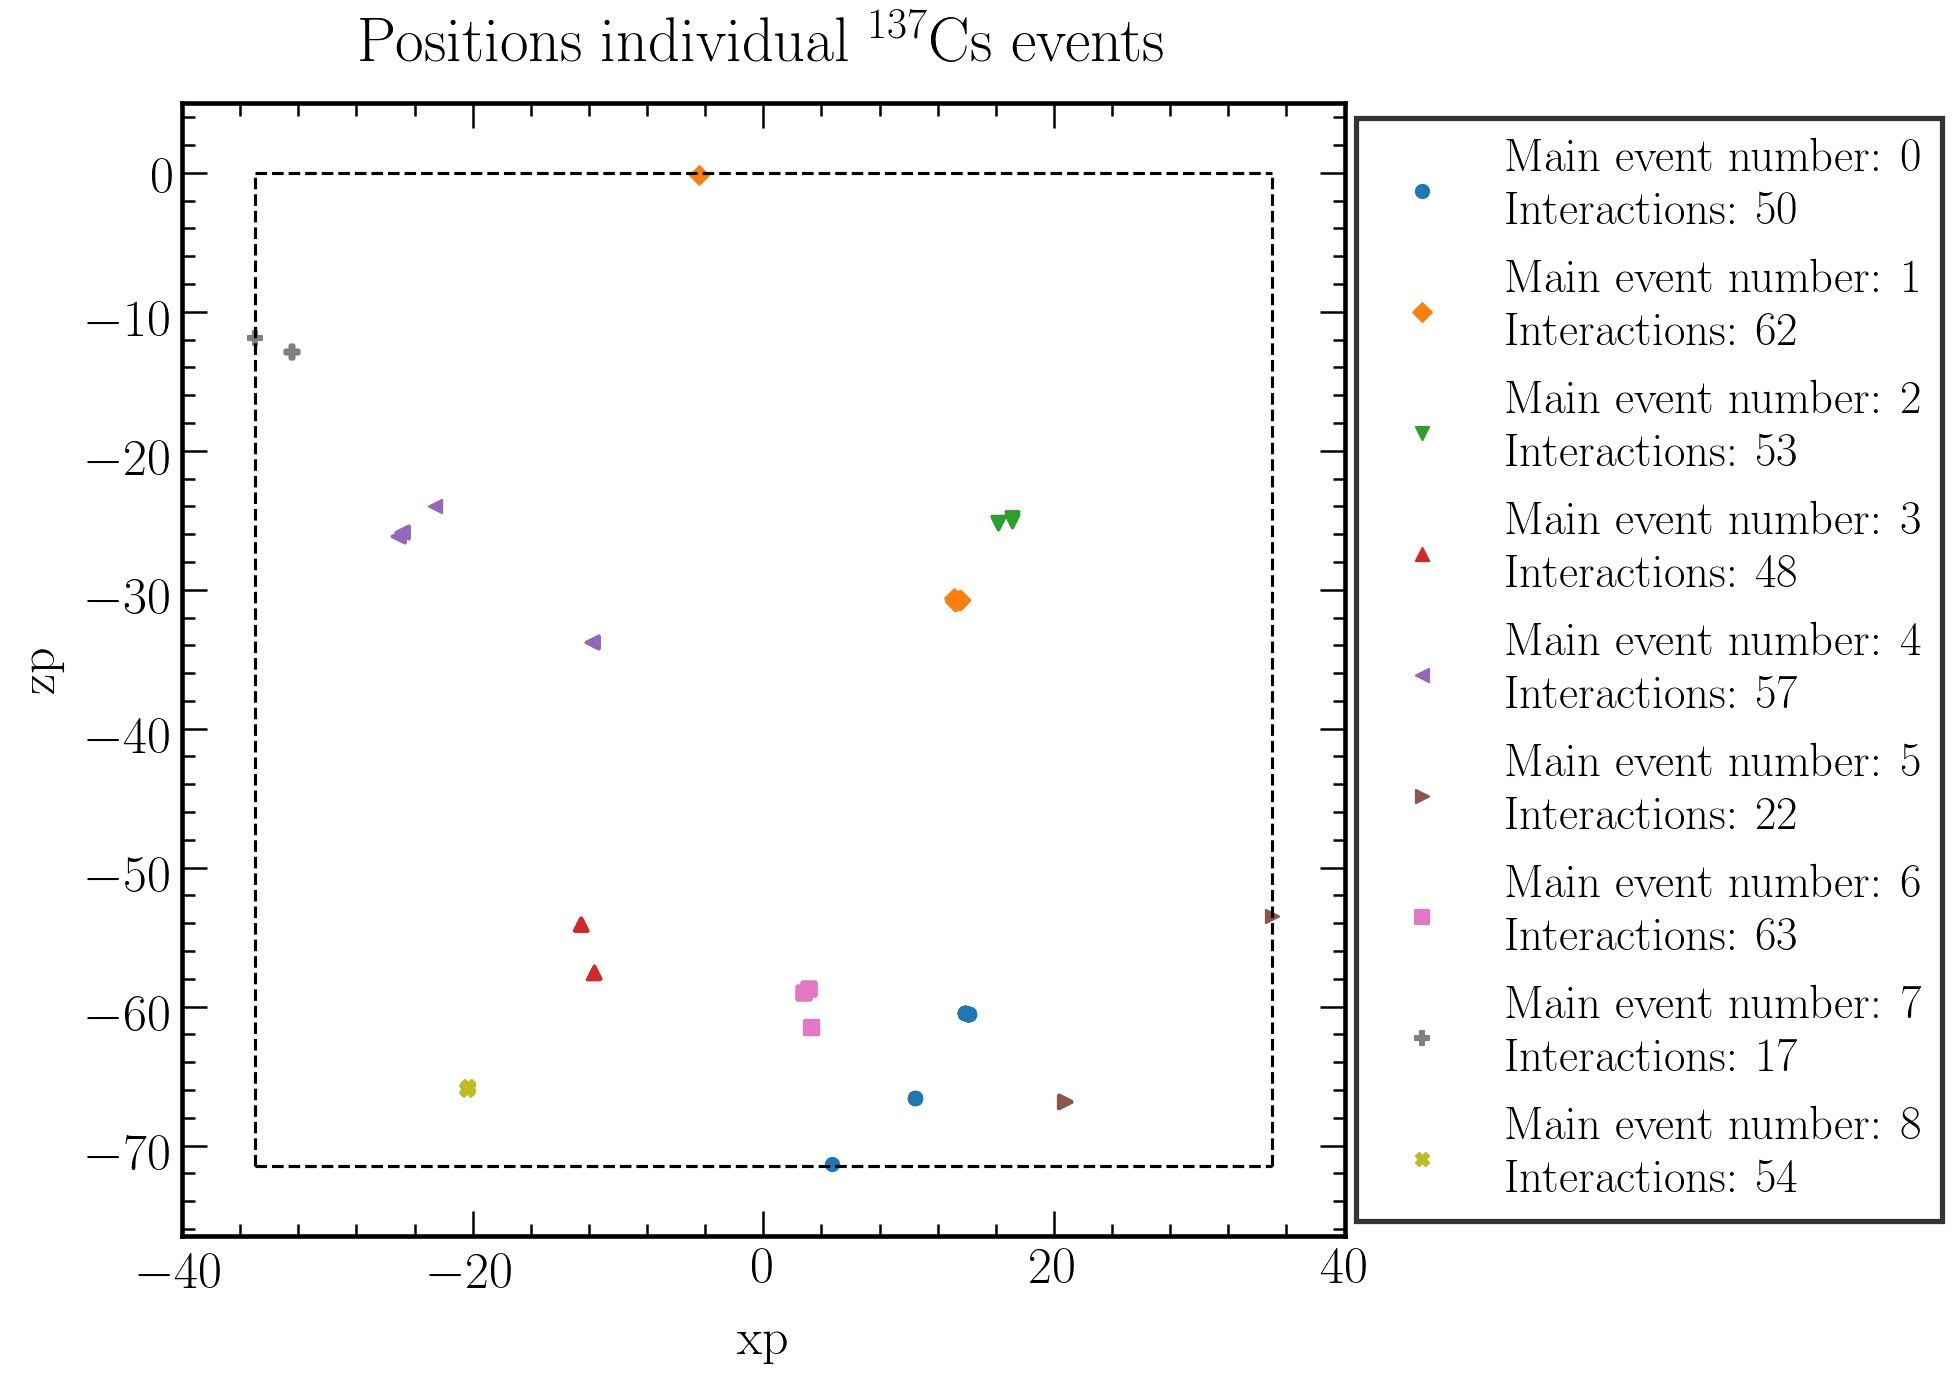

In [16]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(10, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 25
label_pad = 10
title_size = 30
title_pad = 20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot
i = 0
ssize = 40
plt.scatter(_chunk_collect.xp[i], _chunk_collect.zp[i], s = ssize, marker='o', label = 'Main event number: '+str(i+0)+'\nInteractions: '+str(len(_chunk_collect.xp[0])))
plt.scatter(_chunk_collect.xp[i+1], _chunk_collect.zp[i+1], s = ssize, marker='D', label = 'Main event number: '+str(i+1)+'\nInteractions: '+str(len(_chunk_collect.xp[1])))
plt.scatter(_chunk_collect.xp[i+2], _chunk_collect.zp[i+2], s = ssize, marker='v', label = 'Main event number: '+str(i+2)+'\nInteractions: '+str(len(_chunk_collect.xp[2])))
plt.scatter(_chunk_collect.xp[i+3], _chunk_collect.zp[i+3], s = ssize, marker='^', label = 'Main event number: '+str(i+3)+'\nInteractions: '+str(len(_chunk_collect.xp[3])))
plt.scatter(_chunk_collect.xp[i+4], _chunk_collect.zp[i+4], s = ssize, marker='<', label = 'Main event number: '+str(i+4)+'\nInteractions: '+str(len(_chunk_collect.xp[4])))
plt.scatter(_chunk_collect.xp[i+5], _chunk_collect.zp[i+5], s = ssize, marker='>', label = 'Main event number: '+str(i+5)+'\nInteractions: '+str(len(_chunk_collect.xp[5])))
plt.scatter(_chunk_collect.xp[i+6], _chunk_collect.zp[i+6], s = ssize, marker='s', label = 'Main event number: '+str(i+6)+'\nInteractions: '+str(len(_chunk_collect.xp[6])))
plt.scatter(_chunk_collect.xp[i+7], _chunk_collect.zp[i+7], s = ssize, marker='P', label = 'Main event number: '+str(i+7)+'\nInteractions: '+str(len(_chunk_collect.xp[7])))
plt.scatter(_chunk_collect.xp[i+8], _chunk_collect.zp[i+8], s = ssize, marker='X', label = 'Main event number: '+str(i+8)+'\nInteractions: '+str(len(_chunk_collect.xp[8])))

plt.xlabel('xp', fontsize = label_size, labelpad = label_pad)
plt.ylabel('zp', fontsize = label_size, labelpad = label_pad)
plt.title('Positions individual $^{137}$Cs events', fontsize = title_size, pad = title_pad)

# Axes ---> Shading an area or Drawing a vertica line
#axes.axvspan(662-10, 662+10, alpha=0.5, color='0.8')
#plt.axvline(662, alpha=0.5, color='grey')

# Axes ---> Range
plt.xlim(-40,40)
plt.ylim(-76.5,5)

# Rectangle active volume
plt.plot([-35., 35.],[-71.5,-71.5], color='black', linestyle = 'dashed')
plt.plot([-35., 35.],[0,0], color='black', linestyle = 'dashed')
plt.plot([35.,35.],[-71.5,0], color='black', linestyle = 'dashed')
plt.plot([-35.,-35.],[-71.5,0], color='black', linestyle = 'dashed')

# Legend
leg = plt.legend(loc=6, bbox_to_anchor=(0.99,0.5), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False) #, title="Ingredients"
leg.get_title().set_fontsize(label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5) 

plt.show()

fig.savefig(filenameprefix+"_xp_zp_exemplaryscatterplots.png", bbox_extra_artists=(leg,), bbox_inches='tight')

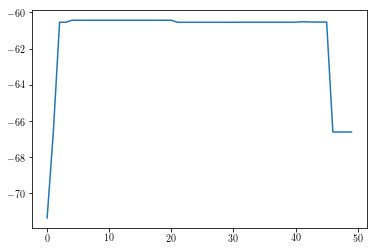

In [17]:
i = 0
plt.plot(range(0, len(_chunk_collect.zp[i])), _chunk_collect.zp[i])
plt.show()

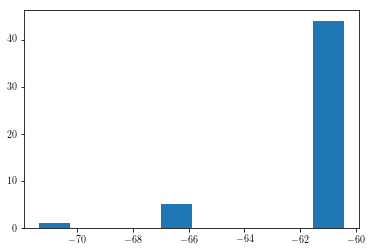

In [18]:
i = 0
plt.hist(_chunk_collect.zp[i])
plt.show()

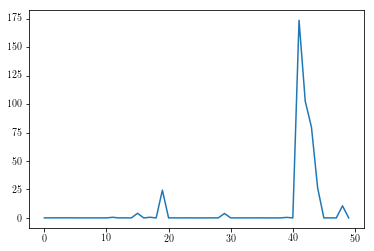

In [19]:
i = 0
plt.plot(range(0, len(_chunk_collect.ed[i])), _chunk_collect.ed[i])
#plt.yscale('log')
plt.show()

50


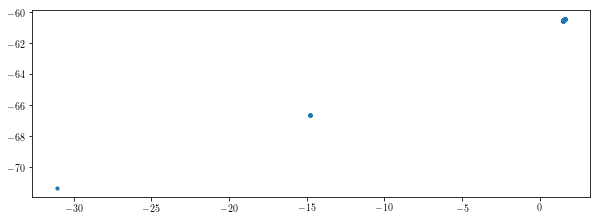

In [20]:
fig=plt.figure(figsize=(10, 10))

i = 0
plt.scatter(_chunk_collect.yp[i], _chunk_collect.zp[i], s = 10,marker='o')
print(len(_chunk_collect.zp[i]))
               
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Estimation cluster size

In [21]:
(np.array([-1,0,1,2])>0).astype(int)

array([0, 0, 1, 1])

In [22]:
zp_mins = np.zeros(len(_chunk_collect.zp))
for i in range(0, len(_chunk_collect.zp)):
    zp_mins[i] = _chunk_collect.zp[i].min()

In [23]:
zp_diffsmin = _chunk_collect.zp - zp_mins

In [24]:
zp_diffsmin_flat = flatten_tuples(zp_diffsmin)

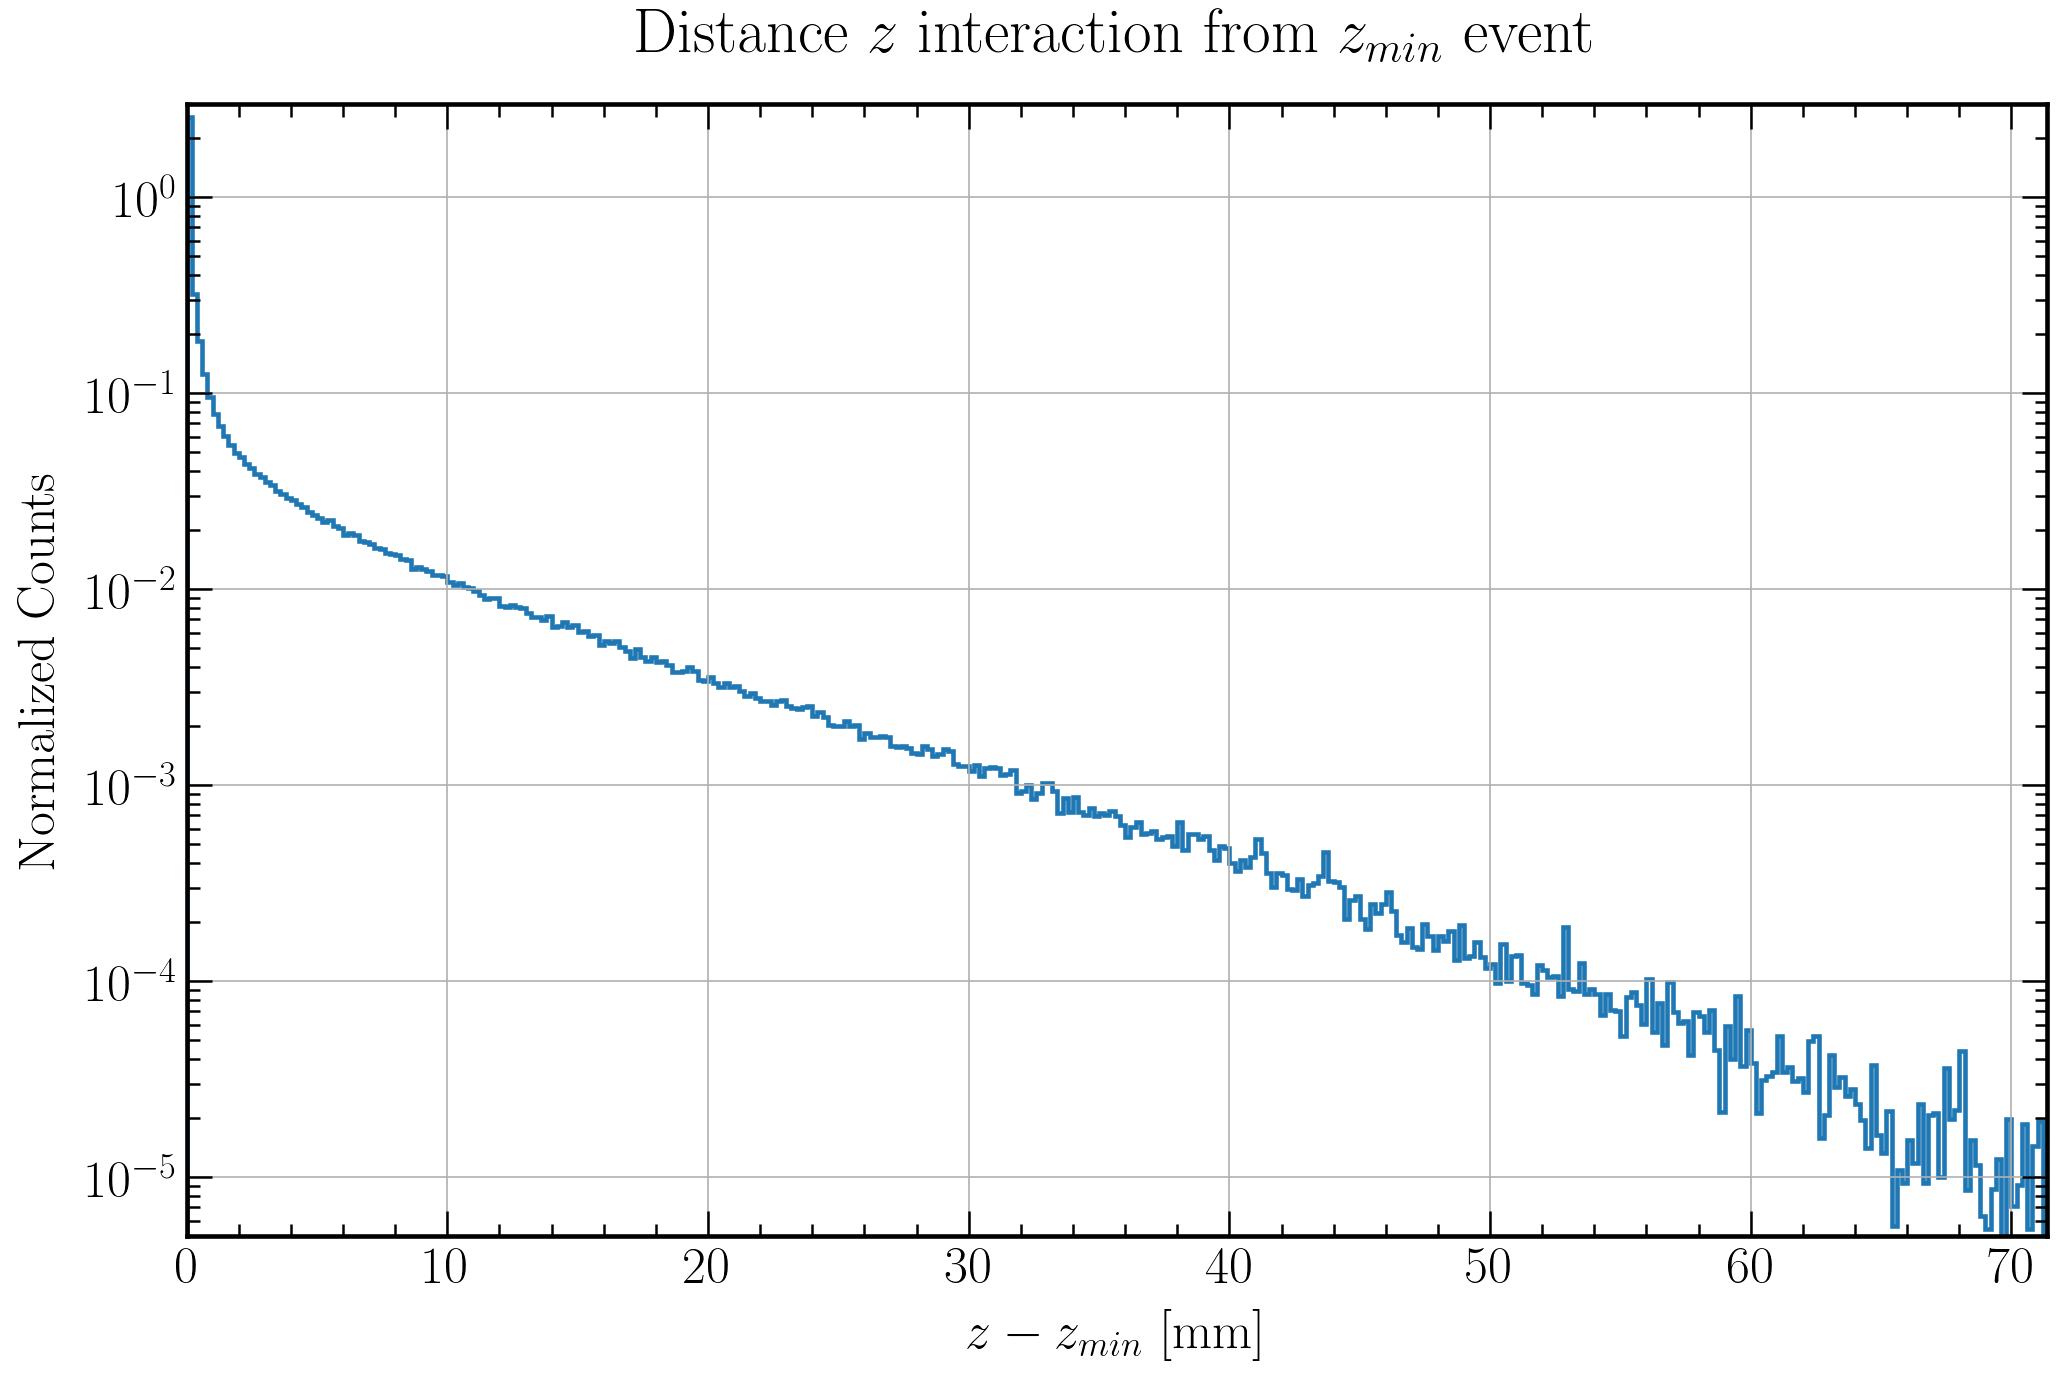

In [25]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 25
label_pad = 10
title_size = 30
title_pad = 20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

numberbins = int(71.2*5)

# Data plot
plt.hist(zp_diffsmin_flat, numberbins, log=True, density = True, histtype = 'step', linewidth = 2.2)

plt.xlabel('$z - z_{min}$ [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Normalized Counts', fontsize = label_size, labelpad = label_pad)
plt.title('Distance $z$ interaction from $z_{min}$ event', fontsize = title_size, pad = title_pad)

# Axes ---> Range
plt.xlim(0,71.35)
plt.ylim(5e-6,3)

fig.savefig(filenameprefix+"_z-zmin.png")
plt.show()

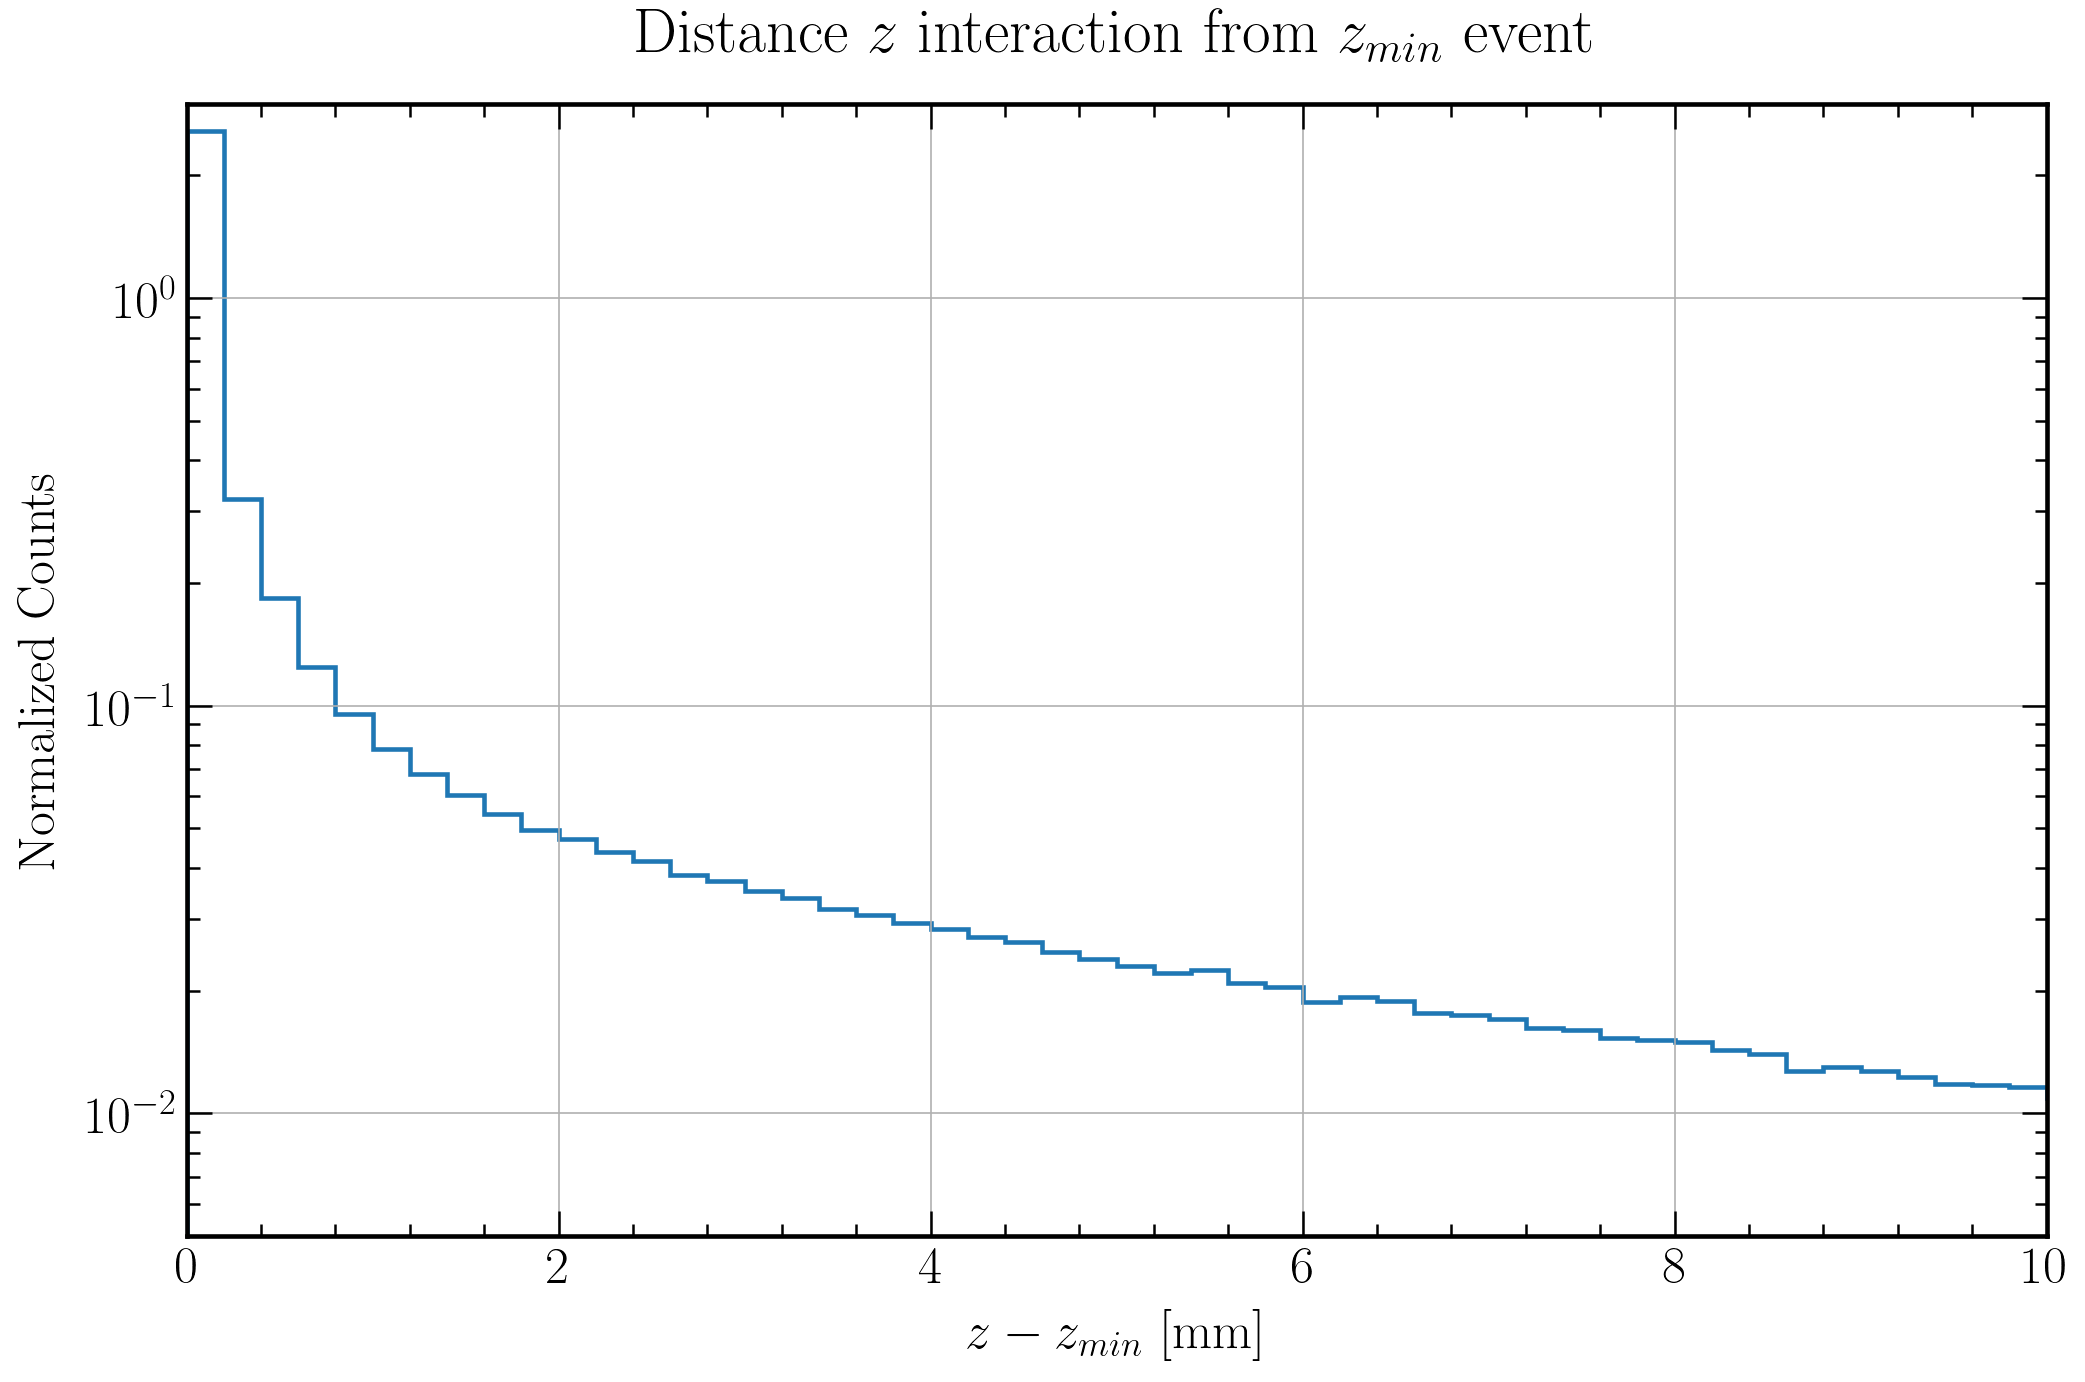

In [26]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 25
label_pad = 10
title_size = 30
title_pad = 20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

numberbins = int(71.2*5)

# Data plot
plt.hist(zp_diffsmin_flat, numberbins, log=True, density = True, histtype = 'step', linewidth = 2.2)

plt.xlabel('$z - z_{min}$ [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Normalized Counts', fontsize = label_size, labelpad = label_pad)
plt.title('Distance $z$ interaction from $z_{min}$ event', fontsize = title_size, pad = title_pad)

# Axes ---> Range
plt.xlim(0,10)
plt.ylim(0.005,3)

fig.savefig(filenameprefix+"_z-zmin_zoom.png")
plt.show()

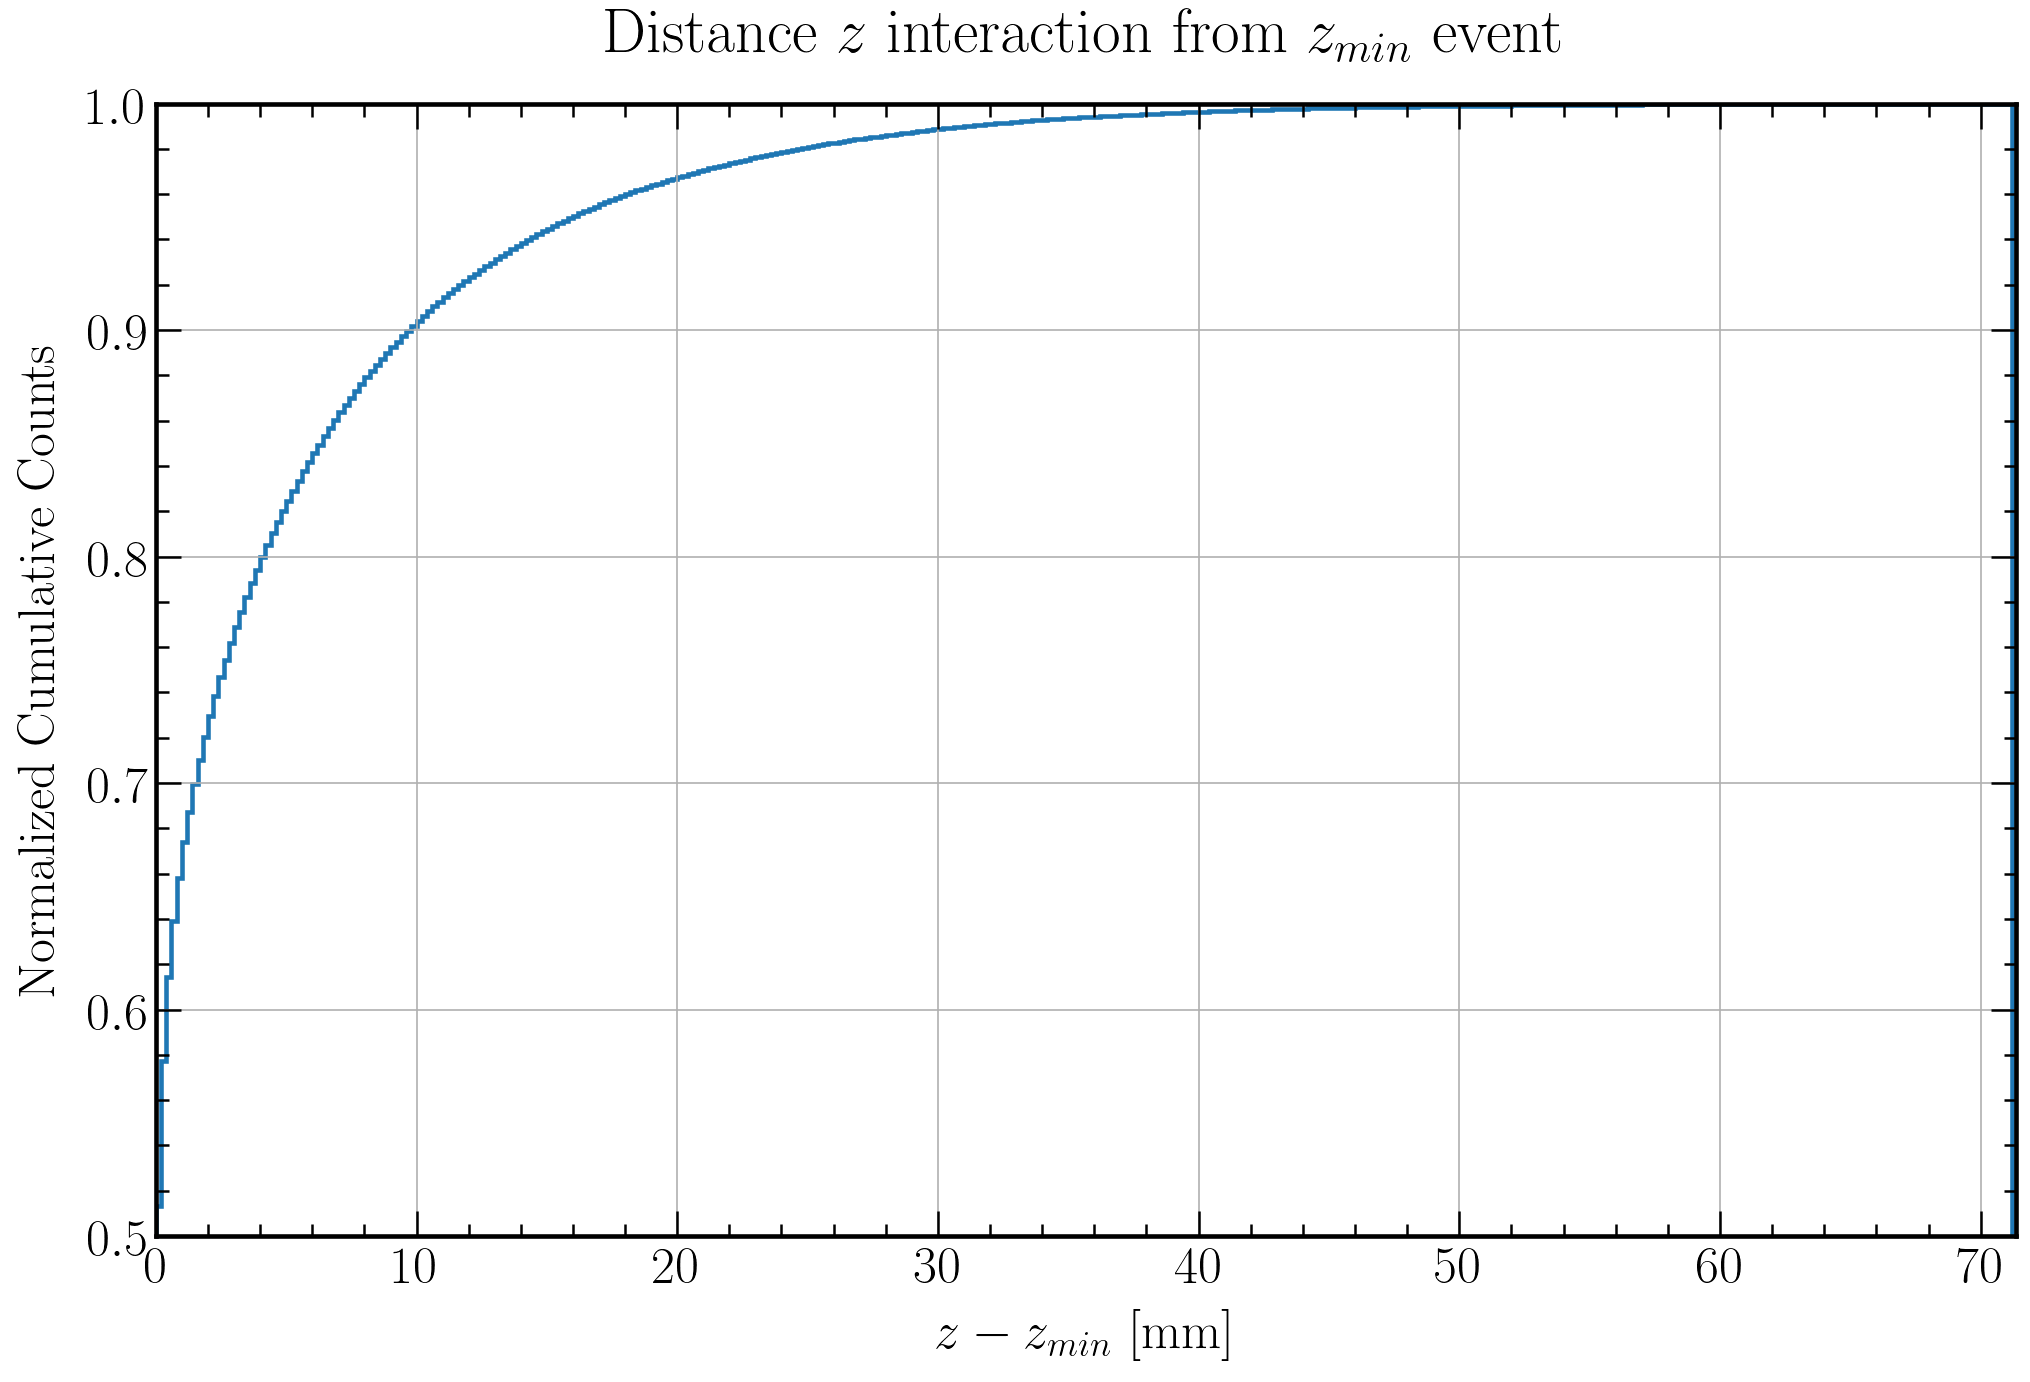

In [27]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 25
label_pad = 10
title_size = 30
title_pad = 20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

numberbins = int(71.2*5)

# Data plot
plt.hist(zp_diffsmin_flat, numberbins, cumulative=True, density = True, histtype = 'step', linewidth = 2.2)

plt.xlabel('$z - z_{min}$ [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Normalized Cumulative Counts', fontsize = label_size, labelpad = label_pad)
plt.title('Distance $z$ interaction from $z_{min}$ event', fontsize = title_size, pad = title_pad)

# Axes ---> Range
plt.xlim(0,71.35)
plt.ylim(0.5,1.0)

fig.savefig(filenameprefix+"_z-zmin_cumulative.png")
plt.show()

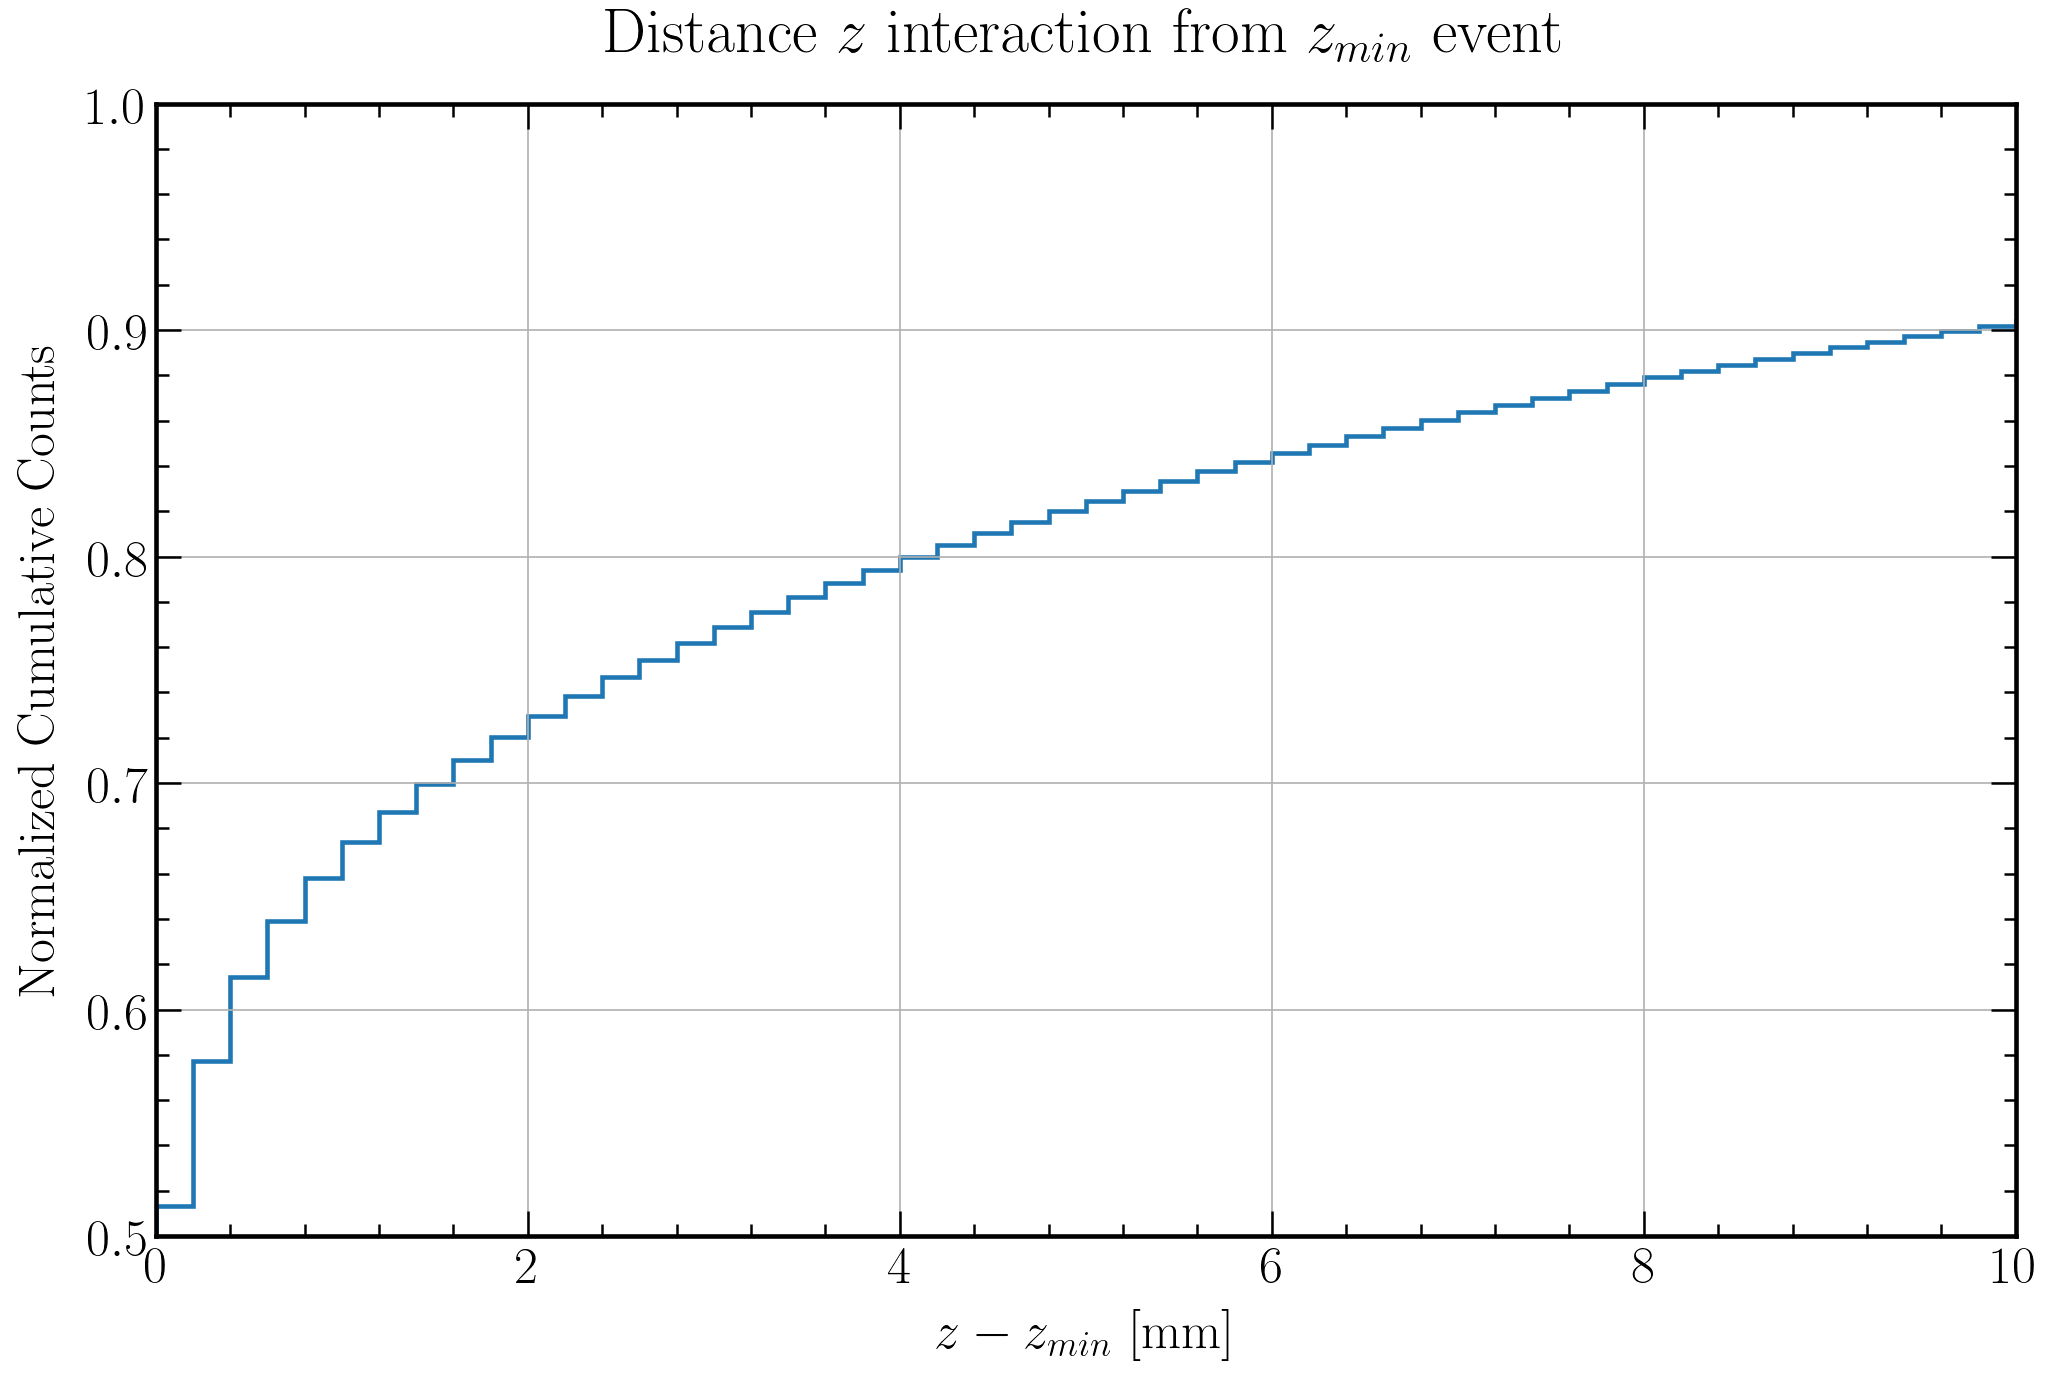

In [28]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 25
label_pad = 10
title_size = 30
title_pad = 20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

numberbins = int(71.2*5)

# Data plot
plt.hist(zp_diffsmin_flat, numberbins, cumulative=True, density = True, histtype = 'step', linewidth = 2.2)

plt.xlabel('$z - z_{min}$ [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Normalized Cumulative Counts', fontsize = label_size, labelpad = label_pad)
plt.title('Distance $z$ interaction from $z_{min}$ event', fontsize = title_size, pad = title_pad)

# Axes ---> Range
plt.xlim(0,10)
plt.ylim(0.5,1)

fig.savefig(filenameprefix+"_z-zmin_cumulative_zoom.png")
plt.show()

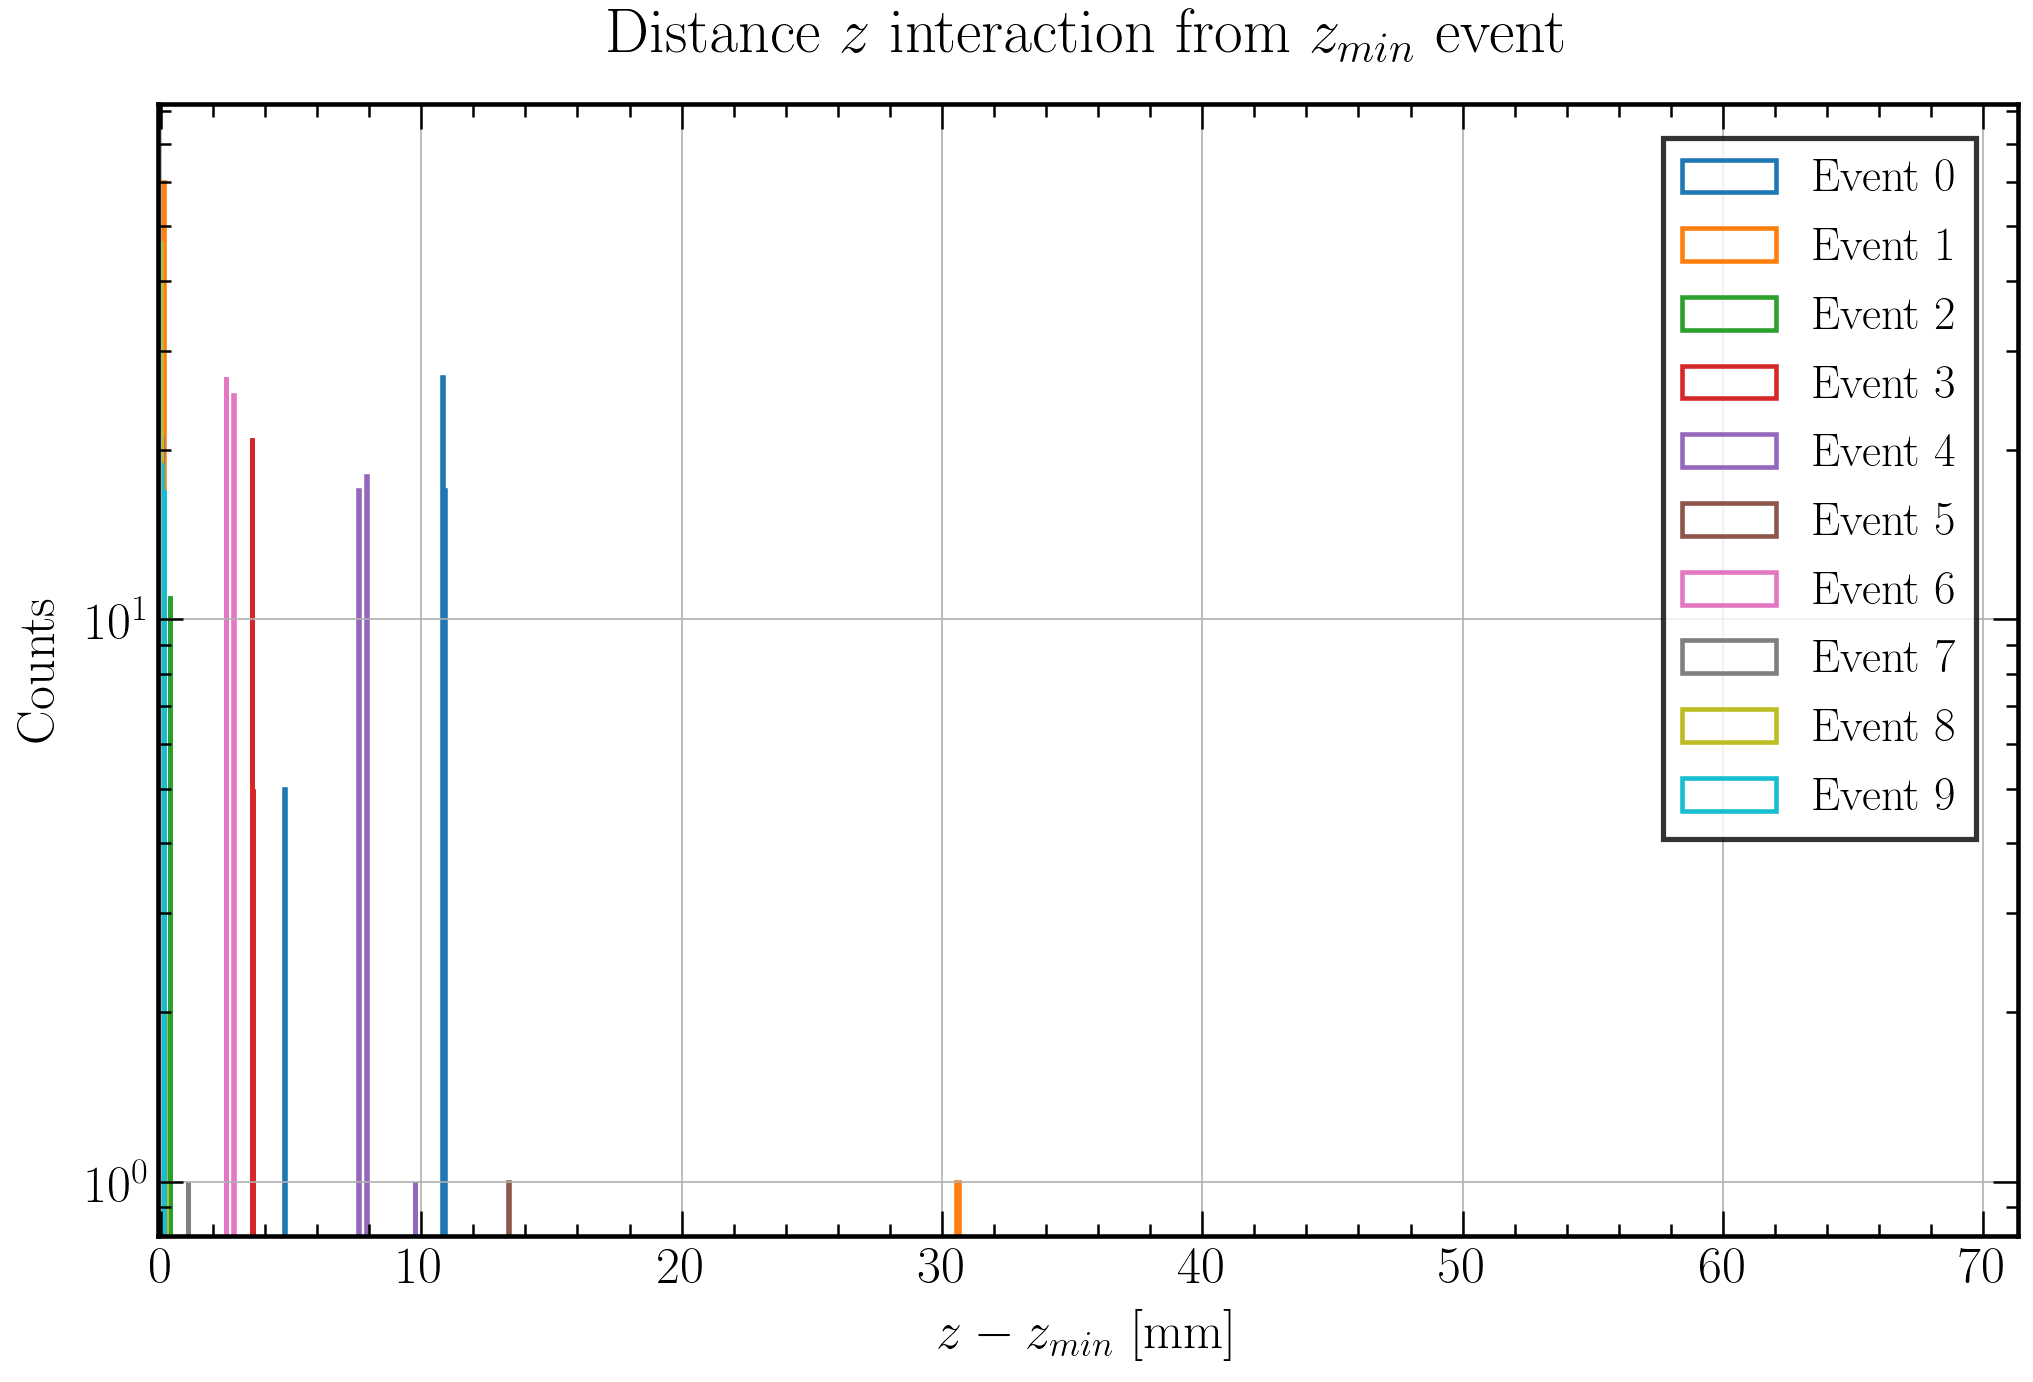

In [64]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 25
label_pad = 10
title_size = 30
title_pad = 20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

numberbins = int(71.2*4)

# Data plot
i = 0
for i in range(0,10):
    plt.hist(zp_diffsmin[i], numberbins, label = 'Event '+str(i), log=True, density = False, histtype = 'step', linewidth = 2.2)


plt.xlabel('$z - z_{min}$ [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Counts', fontsize = label_size, labelpad = label_pad)
plt.title('Distance $z$ interaction from $z_{min}$ event', fontsize = title_size, pad = title_pad)

# Axes ---> Range
plt.xlim(-0.1,71.35)
plt.ylim(bottom = 0.8)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False) #, title="Ingredients"
leg.get_title().set_fontsize(label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5) 

fig.savefig(filenameprefix+"_z-zmin_exemplary.png")
plt.show()

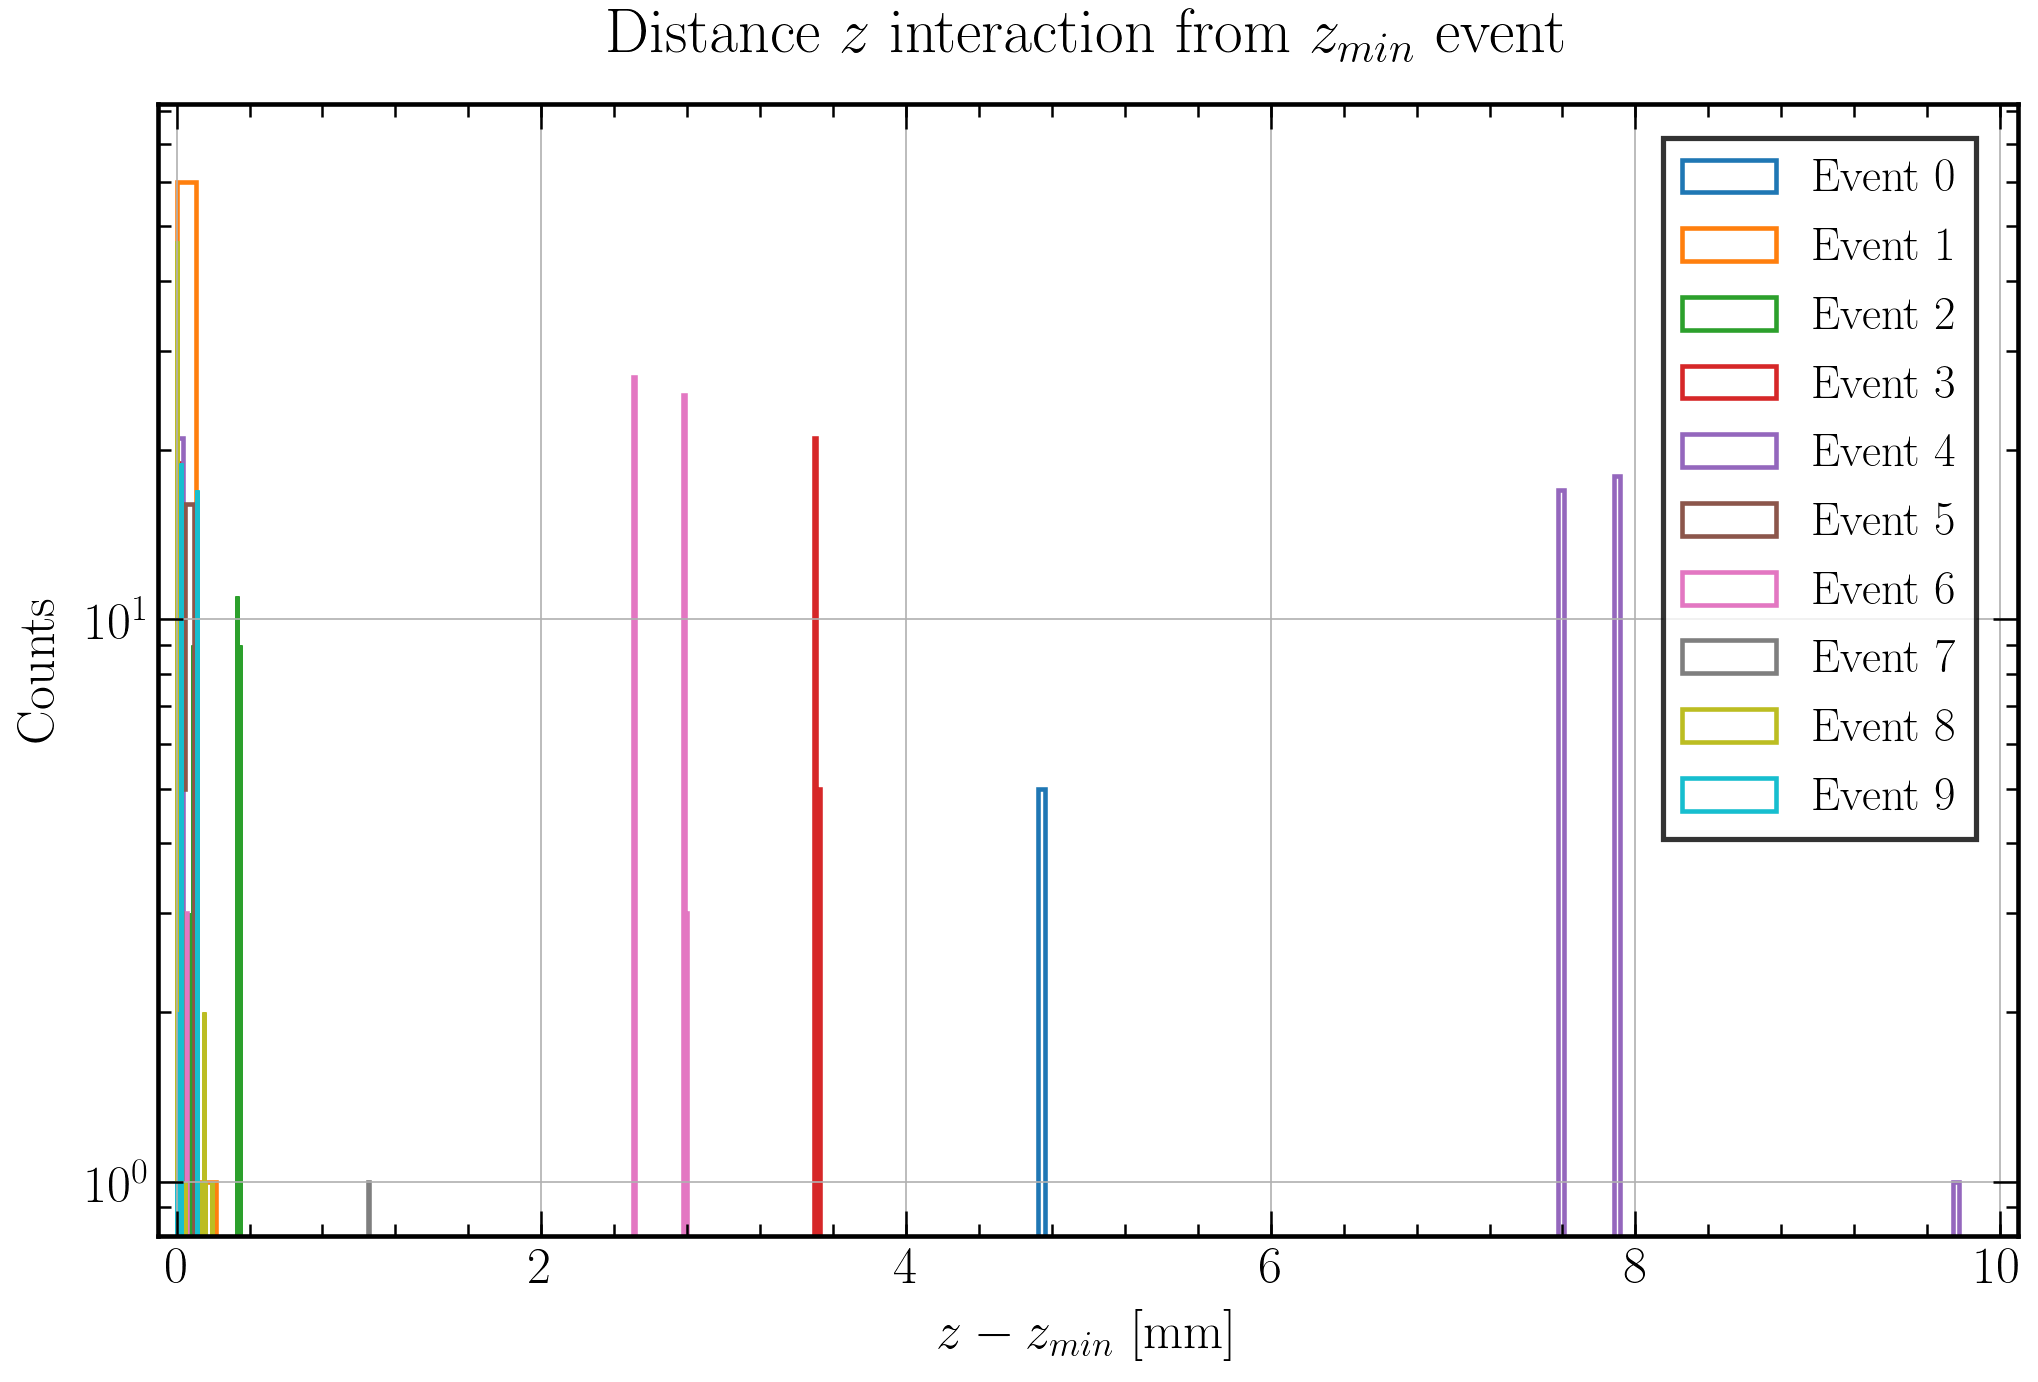

In [62]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 25
label_pad = 10
title_size = 30
title_pad = 20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

numberbins = int(71.2*4)

# Data plot
i = 0
for i in range(0,10):
    plt.hist(zp_diffsmin[i], numberbins, label = 'Event '+str(i), log=True, density = False, histtype = 'step', linewidth = 2.2)


plt.xlabel('$z - z_{min}$ [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Counts', fontsize = label_size, labelpad = label_pad)
plt.title('Distance $z$ interaction from $z_{min}$ event', fontsize = title_size, pad = title_pad)

# Axes ---> Range
plt.xlim(-0.1,10.1)
plt.ylim(bottom = 0.8)

# Legend
leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False) #, title="Ingredients"
leg.get_title().set_fontsize(label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5) 

fig.savefig(filenameprefix+"_z-zmin_zoom_exemplary.png")
plt.show()